In [1]:
# Install required packages
import subprocess
import sys

def install_package(package):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"✓ {package} installed successfully")
    except subprocess.CalledProcessError:
        print(f"✗ Failed to install {package}")

# Install required packages
packages = ['seaborn', 'yellowbrick', 'xgboost', 'scikit-learn', 'matplotlib', 'numpy', 'pandas', 'scipy']

print("Installing required packages...")
for package in packages:
    install_package(package)

print("\nAll packages installation completed!")

Installing required packages...
✓ seaborn installed successfully
✓ seaborn installed successfully
✓ yellowbrick installed successfully
✓ yellowbrick installed successfully
✓ xgboost installed successfully
✓ xgboost installed successfully
✓ scikit-learn installed successfully
✓ scikit-learn installed successfully
✓ matplotlib installed successfully
✓ matplotlib installed successfully
✓ numpy installed successfully
✓ numpy installed successfully
✓ pandas installed successfully
✓ pandas installed successfully
✓ scipy installed successfully

All packages installation completed!
✓ scipy installed successfully

All packages installation completed!


In [2]:
#Basic libraries
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
# Visualization libraries
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import yellowbrick as yb
from matplotlib.colors import ListedColormap
from yellowbrick.classifier import ROCAUC
import matplotlib.patches as mpatches

In [4]:
# Statistics, EDA, metrics libraries
from scipy.stats import normaltest, skew
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error, accuracy_score, f1_score
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import classification_report, confusion_matrix
from scipy.special import boxcox, inv_boxcox

In [7]:
# Modeling libraries
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, cross_val_predict,  KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.decomposition import PCA
from scipy.stats import zscore
from itertools import combinations
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('METABRIC_RNA_Mutation.csv')
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1904 rows and 693 columns


In [10]:
df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,mtap_mut,ppp2cb_mut,smarcd1_mut,nras_mut,ndfip1_mut,hras_mut,prps2_mut,smarcb1_mut,stmn2_mut,siah1_mut
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,0,0,0,0,0,0,0,0,0,0


In [11]:
#Finding missing data and the percentage of it in each column
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total_NaN', 'Percent_Nan'])

In [12]:
missing_data.head(10)

,Total_NaN,Percent_Nan
tumor_stage,501,0.263130
3-gene_classifier_subtype,204,0.107143
primary_tumor_laterality,106,0.055672
neoplasm_histologic_grade,72,0.037815
cellularity,54,0.028361
mutation_count,45,0.023634
er_status_measured_by_ihc,30,0.015756
type_of_breast_surgery,22,0.011555
tumor_size,20,0.010504
cancer_type_detailed,15,0.007878


In [13]:
missing_data.shape

(693, 2)

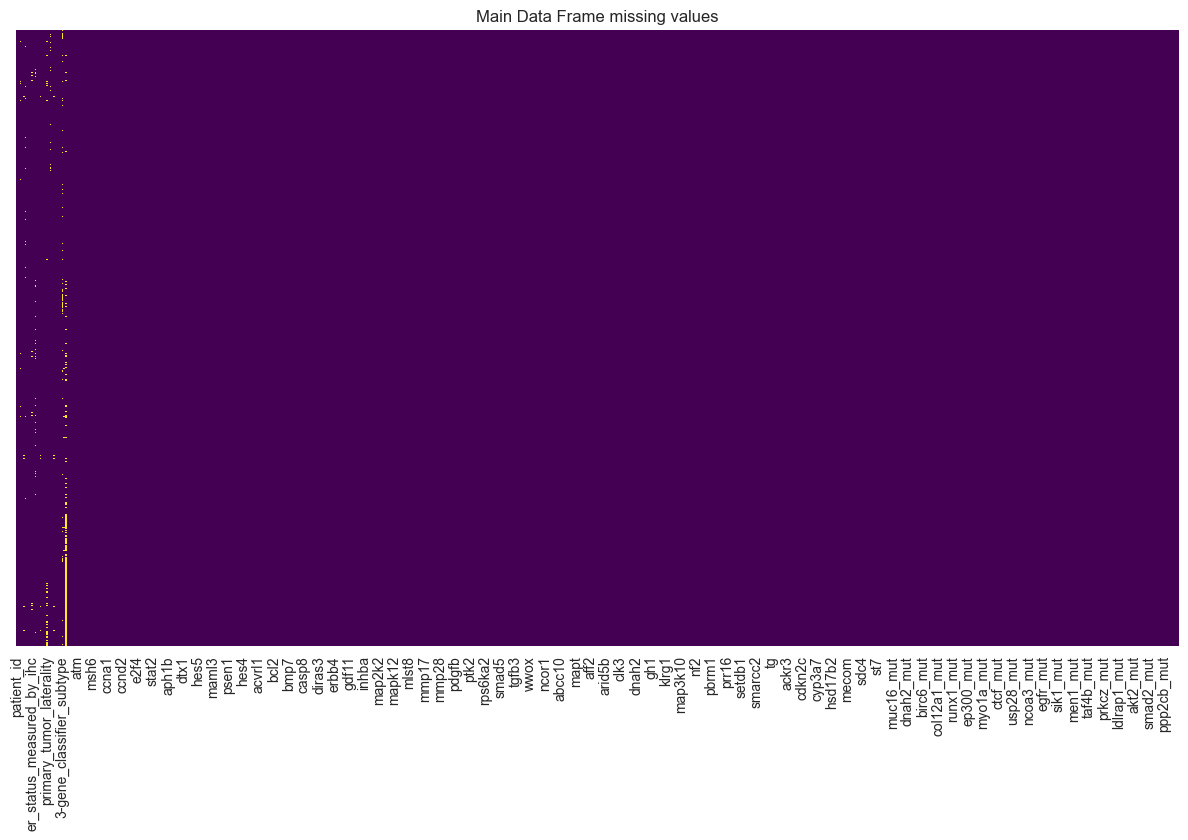

In [14]:
# Visualization of missing data
fig, ax = plt.subplots( figsize = (15, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
ax.set_title('Main Data Frame missing values')
plt.show()

The genetic data in the dataframe is complete with no missing data. However, the clinical data has some categorical clinical features that had up to 26% missing data (tumor_stage column has 26% missing data, while 3-gene_classifier_subtype has 10.7% missing data, and primary_tumor_laterality contains 3.7% missing data). There are 9 features that contains around 3 -0.001% missing data, and the rest of the features are complete.

### Exploratory Data Analysis and Data Visualization

a) Relationship between clinical attributes and outcomes

In [15]:
# create a new dataframe for clinical attributes only
clinical_features_to_drop = df.columns[31:] # fetching non clinical attributes
clinical_df = df.drop(clinical_features_to_drop, axis=1)
clinical_df.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [16]:
## aleternate way to get the clinical_df
df.iloc[:, :31].head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
0,0,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,0,claudin-low,1.0,Positve,...,6.044,IDC,140.500000,1,Negative,1,ER-/HER2-,22.0,2.0,Living
1,2,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,0,LumA,1.0,Positve,...,4.020,IDC,84.633333,1,Positive,1,ER+/HER2- High Prolif,10.0,1.0,Living
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
3,6,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,1,LumB,1.0,Positve,...,4.050,MDLC,164.933333,1,Positive,1,NaN,25.0,2.0,Living
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease


In [17]:
clinical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 31 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   patient_id                      1904 non-null   int64  
 1   age_at_diagnosis                1904 non-null   float64
 2   type_of_breast_surgery          1882 non-null   object 
 3   cancer_type                     1904 non-null   object 
 4   cancer_type_detailed            1889 non-null   object 
 5   cellularity                     1850 non-null   object 
 6   chemotherapy                    1904 non-null   int64  
 7   pam50_+_claudin-low_subtype     1904 non-null   object 
 8   cohort                          1904 non-null   float64
 9   er_status_measured_by_ihc       1874 non-null   object 
 10  er_status                       1904 non-null   object 
 11  neoplasm_histologic_grade       1832 non-null   float64
 12  her2_status_measured_by_snp6    19

In [18]:
def to_standard (df):
    
    num_df = df[df.select_dtypes(include = np.number).columns.tolist()]
    
    ss = StandardScaler()
    std = ss.fit_transform(num_df)
    
    std_df = pd.DataFrame(std, index = num_df.index, columns = num_df.columns)
    return std_df

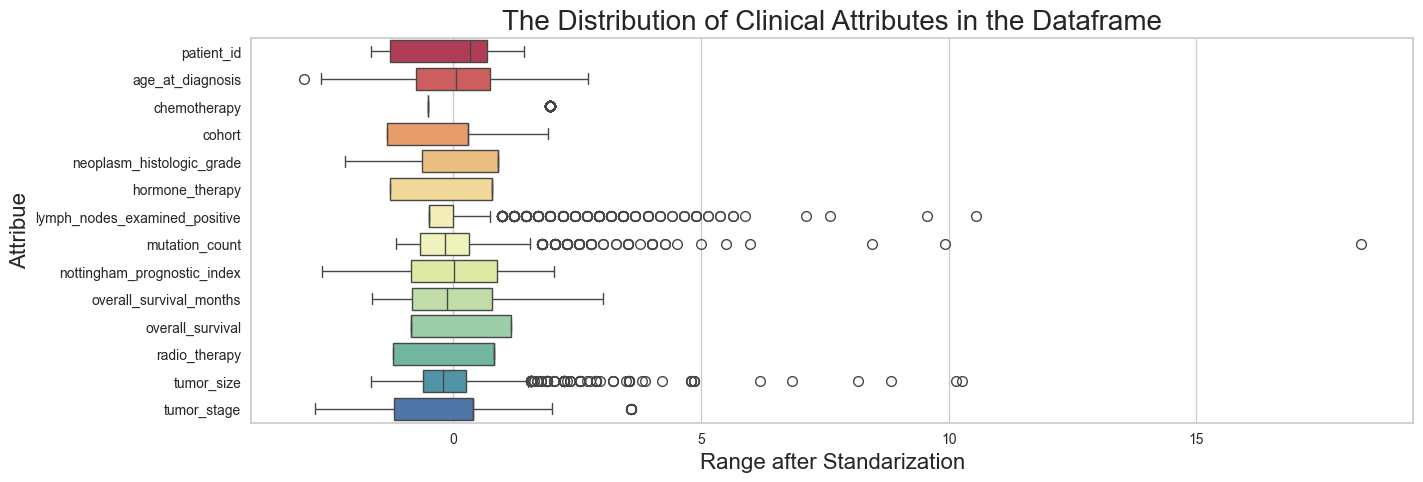

In [19]:
ax, fig = plt.subplots(1, 1, figsize = (15, 5))
plt.title('The Distribution of Clinical Attributes in the Dataframe', fontsize = 20) #Change please

sns.boxplot(y = "variable", x = "value", data = pd.melt(to_standard(clinical_df)), palette = 'Spectral')
plt.xlabel('Range after Standarization', size = 16)
plt.ylabel('Attribue', size = 16)


plt.show()

For the distribution of all numerical data, some of them are normally distributed (like tumor_stage, and age_at_diagnosis), but most of the features are right skewed with a lot of outliers (lymph_nodes_examined_positive, mutation_count, and tumor_size). We decided to keep the outliers, as they are very important in healthcare data.

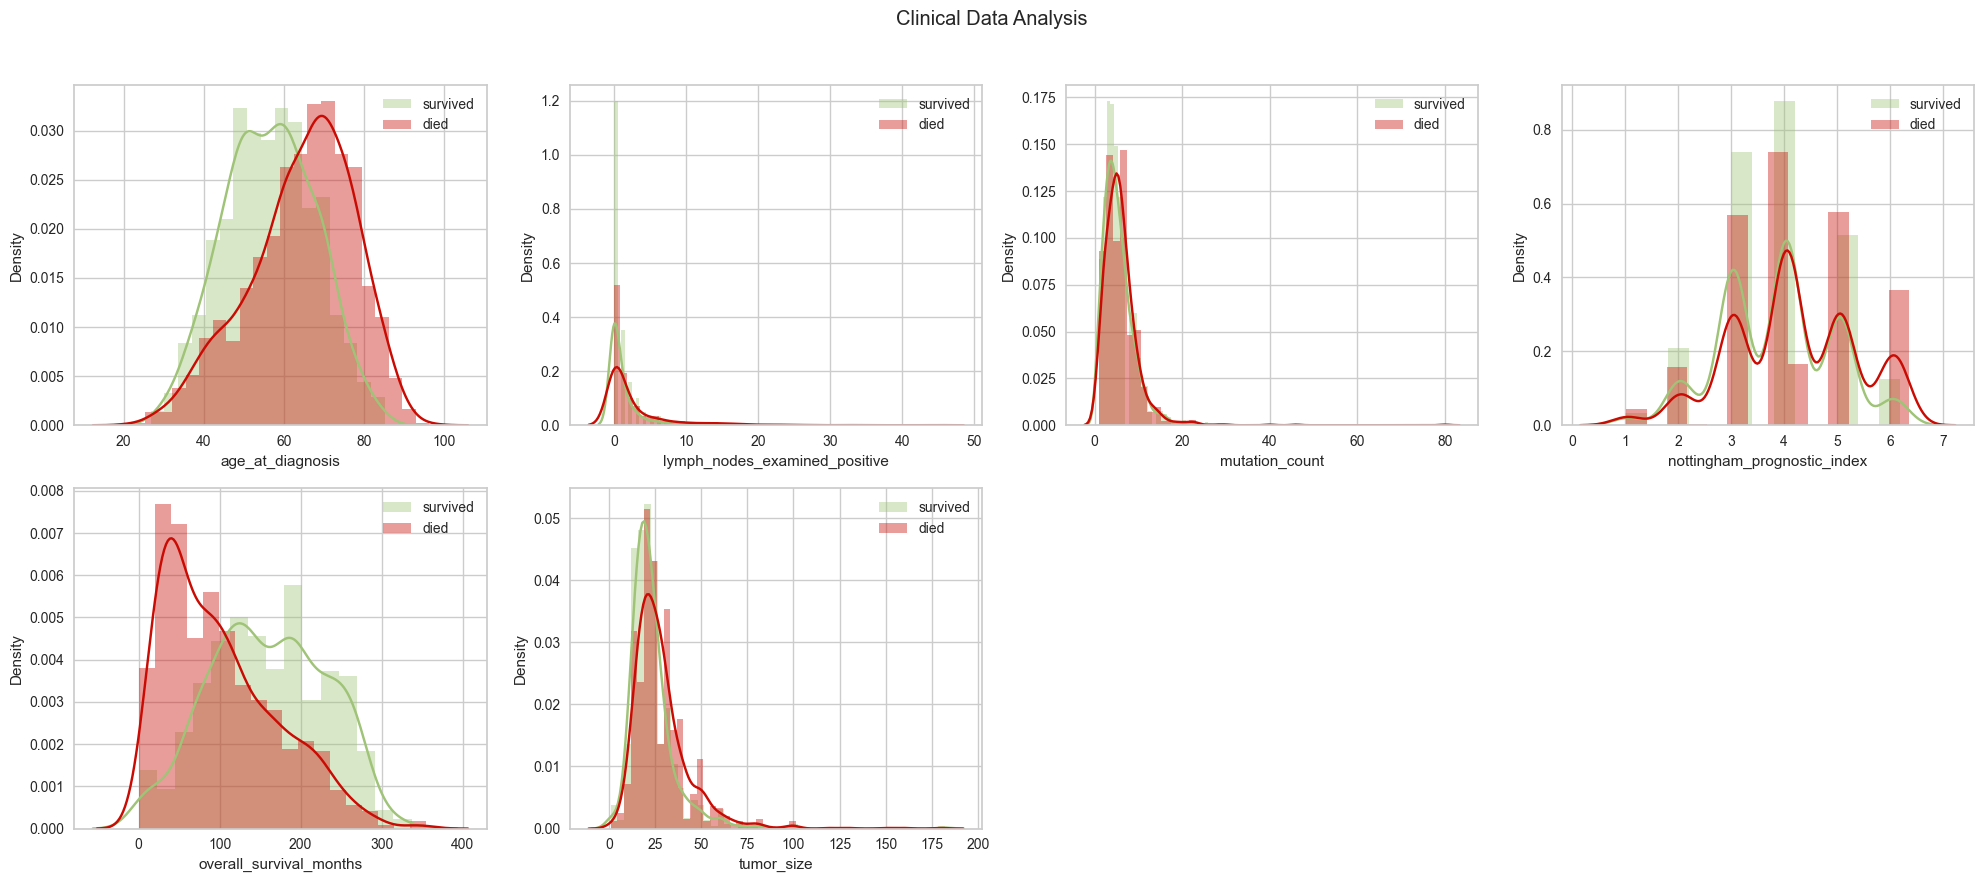

In [20]:
fig = plt.figure(figsize = (20, 25))
j = 0
num_clinical_columns= ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count','nottingham_prognostic_index', 'overall_survival_months', 'tumor_size' ]
for i in clinical_df[num_clinical_columns].columns:
    plt.subplot(6, 4, j+1)
    j += 1
    sns.distplot(clinical_df[i][clinical_df['overall_survival']==1], color='g', label = 'survived')
    sns.distplot(clinical_df[i][clinical_df['overall_survival']==0], color='r', label = 'died')
    plt.legend(loc='best')
fig.suptitle('Clinical Data Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

In [21]:
died = clinical_df[clinical_df['overall_survival']==0]
survived = clinical_df[clinical_df['overall_survival']==1]

alive = clinical_df[clinical_df['death_from_cancer']=='Living']
died_cancer = clinical_df[clinical_df['death_from_cancer']=='Died of Disease']
died_not_cancer = clinical_df[clinical_df['death_from_cancer']=='Died of Other Causes']

In [22]:
color= "Spectral"
two_colors = [ sns.color_palette(color)[0], sns.color_palette(color)[5]]
two_colors


[(0.8853517877739331, 0.3190311418685121, 0.29042675893886966),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197)]

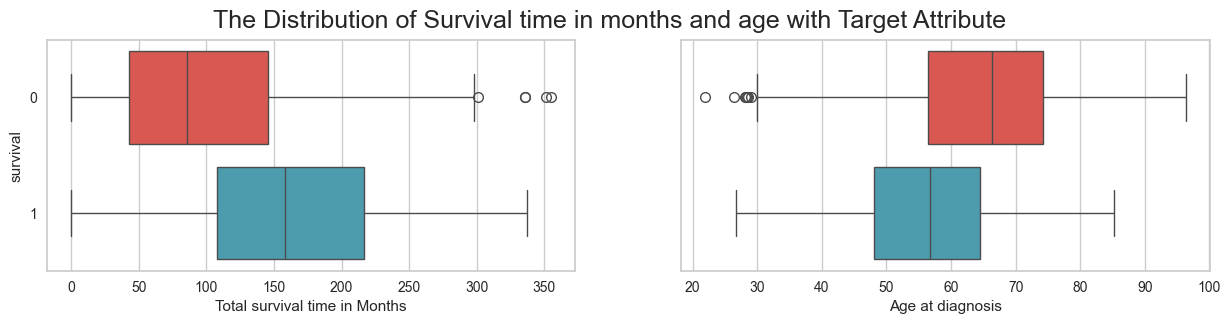

In [23]:
fig, ax = plt.subplots(ncols=2, figsize=(15,3), sharey=True)

sns.boxplot(x='overall_survival_months', y='overall_survival', orient='h', data=clinical_df, ax=ax[0], palette = two_colors, saturation=0.90)
sns.boxplot(x='age_at_diagnosis', y='overall_survival', orient='h', data=clinical_df, ax=ax[1], palette = two_colors, saturation=0.90)

fig.suptitle('The Distribution of Survival time in months and age with Target Attribute', fontsize = 18)

ax[0].set_xlabel('Total survival time in Months')
ax[0].set_ylabel('survival')
ax[1].set_xlabel('Age at diagnosis')
ax[1].set_ylabel('')

plt.show()

To compare between the two classes of patients who survived and patients who did not, we can see the difference between the two distributions in age_at_diagnosis column, as patients who were younger when diagnosed with breast cancer were more likely to survive. Also, the duration from the time of the intervention to death or to current time is longer in the patients who survive. That means that pateints are either dying early from breast cancer or surviving.

In [24]:


three_colors = [ sns.color_palette(color)[5],sns.color_palette(color)[2], sns.color_palette(color)[0]]

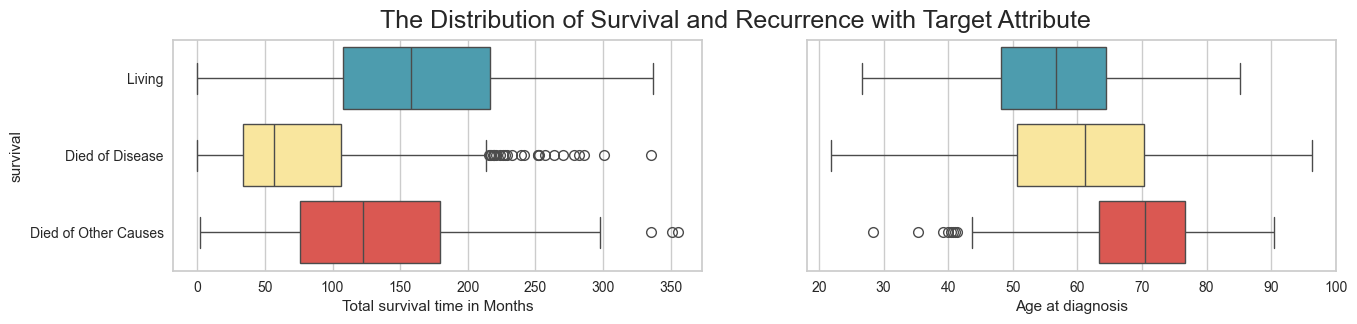

In [25]:
fig, ax = plt.subplots(ncols=2, figsize=(15,3), sharey=True)

sns.boxplot(x='overall_survival_months', y='death_from_cancer', orient='h', data=clinical_df, ax=ax[0], palette = three_colors, saturation=0.90)
sns.boxplot(x='age_at_diagnosis', y='death_from_cancer', orient='h', data=clinical_df, ax=ax[1], palette = three_colors, saturation=0.90)

fig.suptitle('The Distribution of Survival and Recurrence with Target Attribute', fontsize = 18)

ax[0].set_xlabel('Total survival time in Months')
ax[0].set_ylabel('survival')
ax[1].set_xlabel('Age at diagnosis')
ax[1].set_ylabel('')

plt.show()

The variable 'death_from_cancer' shows us if the patient is alive or died from cancer or its complications or died of other causes. From the distribution of the three classes, we can see that the median of the survival time in months of patients who died from breast cancer is low compared to the other two classes, and its distribution os right-skewed with a lot of outliers. Also, patients who died from other causes than cancer tend to be older than the other two classes. The distribution of it is left-skewed with some younger outliers.

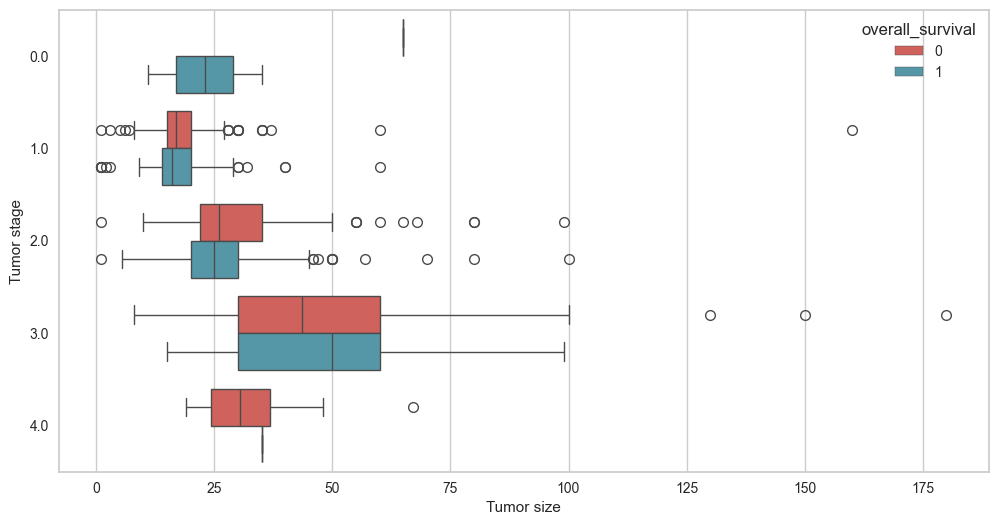

In [26]:
ig, ax = plt.subplots( figsize=(12, 6))
ax = sns.boxplot(x ='tumor_size', y ='tumor_stage',  data = clinical_df, orient='h', hue='overall_survival', palette=two_colors)

ax.set_ylabel('Tumor stage')
ax.set_xlabel('Tumor size')
fig.suptitle('Tumor stage vs. Tumor size and overall_survival', fontsize=20)

#legend = ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

As the Tumer stage increases the tumor size increases as well. Also, if lower tumor stages the probability of survival is higher than when the patient reaches the fourth stage

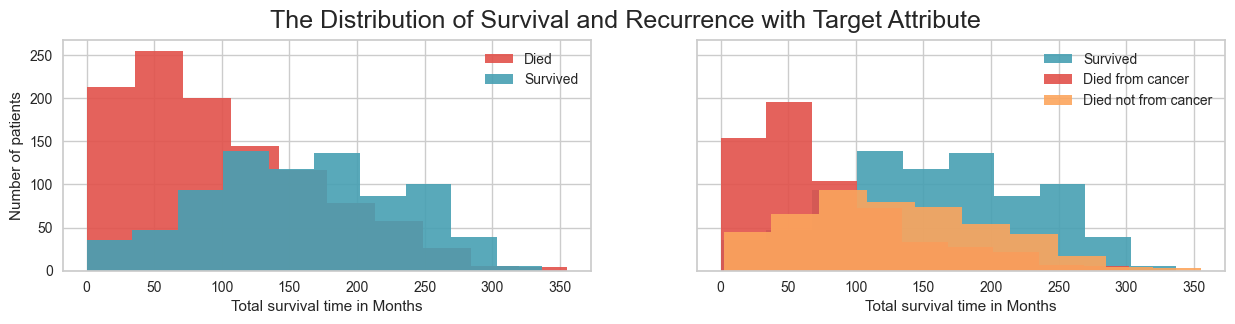

In [27]:
fig, ax = plt.subplots(ncols=2, figsize=(15,3), sharey=True)

fig.suptitle('The Distribution of Survival and Recurrence with Target Attribute', fontsize = 18)

ax[0].hist(died['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[0].hist(survived['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[0].legend()

ax[1].hist(alive['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[0], label='Died from cancer')
ax[1].hist(died_not_cancer['overall_survival_months'], alpha=0.9, color=sns.color_palette(color)[1], label='Died not from cancer')
ax[1].legend()

ax[0].set_xlabel('Total survival time in Months')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Total survival time in Months')
ax[1].set_ylabel('')

plt.show()

When the total survival time in months increases, the probability of survival increases as well, and the probability of dying from reasons other than cancer decrease with time slightly.

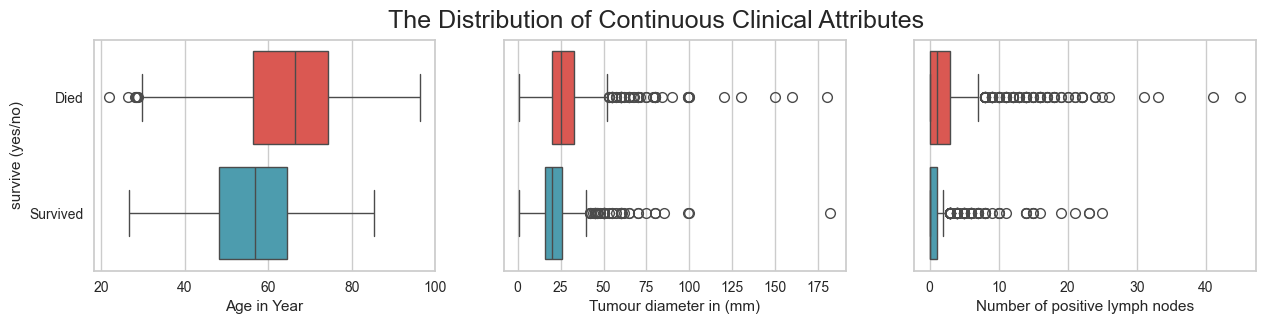

In [32]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3), sharey=True)

sns.boxplot(x='age_at_diagnosis', y='overall_survival', orient='h', data=clinical_df, ax=ax[0], palette = two_colors, saturation=0.90)
sns.boxplot(x='tumor_size', y='overall_survival', orient='h', data=clinical_df, ax=ax[1], palette = two_colors, saturation=0.90)
sns.boxplot(x='lymph_nodes_examined_positive', y='overall_survival', orient='h', data=clinical_df, ax=ax[2], palette = two_colors, saturation=0.90)

fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)
plt.yticks([-0.5, 0, 1, 1.5], ['','Died', 'Survived',''])
ax[0].set_xlabel('Age in Year')
ax[0].set_ylabel('survive (yes/no)')

ax[1].set_xlabel('Tumour diameter in (mm)')
ax[1].set_ylabel('')

ax[2].set_xlabel('Number of positive lymph nodes')
ax[2].set_ylabel('')

plt.show()

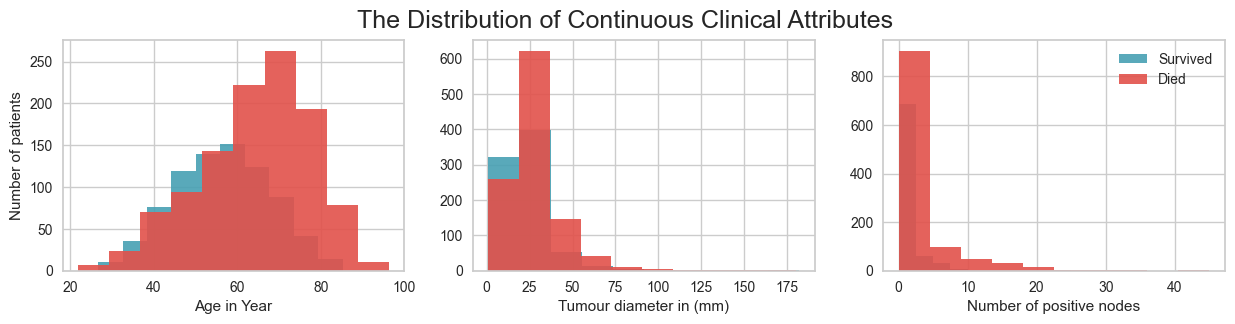

In [33]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)

ax[0].hist(survived['age_at_diagnosis'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[0].hist(died['age_at_diagnosis'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
#ax[0].legend()

ax[1].hist(survived['tumor_size'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died['tumor_size'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
#ax[1].legend()

ax[2].hist(survived['lymph_nodes_examined_positive'], alpha=0.9, color=sns.color_palette(color)[5], label='Survived')
ax[2].hist(died['lymph_nodes_examined_positive'], alpha=0.9, color=sns.color_palette(color)[0], label='Died')
ax[2].legend()

ax[0].set_xlabel('Age in Year')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Tumour diameter in (mm)')
ax[1].set_ylabel('')
ax[2].set_xlabel('Number of positive nodes')
ax[2].set_ylabel('')

plt.show()

The median of tumor size and the number of positive lymph nodes is lower in the survived class than the died class.

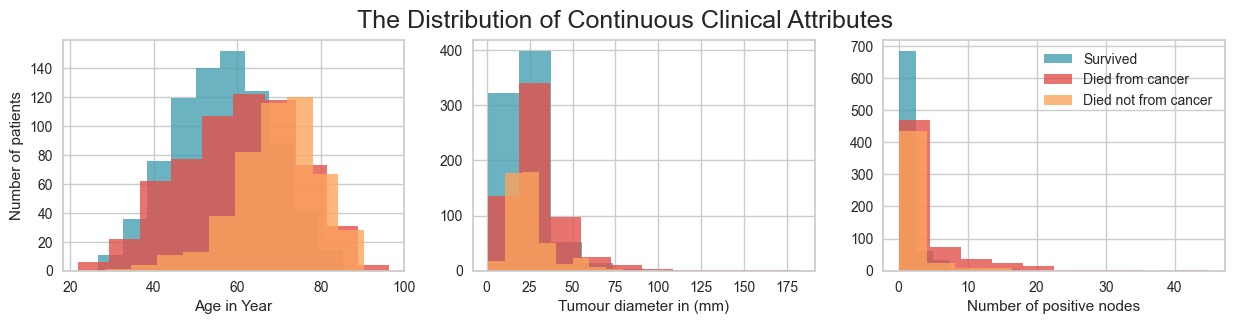

In [34]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('The Distribution of Continuous Clinical Attributes', fontsize = 18)

ax[0].hist(alive['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
ax[0].hist(died_cancer['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
ax[0].hist(died_not_cancer['age_at_diagnosis'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
#ax[0].legend()

ax[1].hist(alive['tumor_size'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
ax[1].hist(died_cancer['tumor_size'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
ax[1].hist(died_not_cancer['tumor_size'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
#ax[1].legend()

ax[2].hist(survived['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[5], label='Survived')
ax[2].hist(died_cancer['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[0], label='Died from cancer')
ax[2].hist(died_not_cancer['lymph_nodes_examined_positive'], alpha=0.8, color=sns.color_palette(color)[1], label='Died not from cancer')
ax[2].legend()

ax[0].set_xlabel('Age in Year')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Tumour diameter in (mm)')
ax[1].set_ylabel('')
ax[2].set_xlabel('Number of positive nodes')
ax[2].set_ylabel('')

plt.show()

In [35]:
died.head()

,patient_id,age_at_diagnosis,type_of_breast_surgery,cancer_type,cancer_type_detailed,cellularity,chemotherapy,pam50_+_claudin-low_subtype,cohort,er_status_measured_by_ihc,...,nottingham_prognostic_index,oncotree_code,overall_survival_months,overall_survival,pr_status,radio_therapy,3-gene_classifier_subtype,tumor_size,tumor_stage,death_from_cancer
2,5,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,1,LumB,1.0,Positve,...,4.030,IDC,163.700000,0,Positive,0,NaN,15.0,2.0,Died of Disease
4,8,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,1,LumB,1.0,Positve,...,6.080,MDLC,41.366667,0,Positive,1,ER+/HER2- High Prolif,40.0,2.0,Died of Disease
5,10,78.77,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,4.062,IDC,7.800000,0,Positive,1,ER+/HER2- High Prolif,31.0,4.0,Died of Disease
7,22,89.08,BREAST CONSERVING,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,0,claudin-low,1.0,Positve,...,4.058,MDLC,99.533333,0,Negative,1,NaN,29.0,2.0,Died of Other Causes
8,28,86.41,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,Moderate,0,LumB,1.0,Positve,...,5.032,IDC,36.566667,0,Negative,1,ER+/HER2- High Prolif,16.0,2.0,Died of Other Causes


In [36]:
died['chemotherapy']

2       1
4       1
5       0
7       0
8       0
       ..
1898    0
1900    0
1901    0
1902    0
1903    0
Name: chemotherapy, Length: 1103, dtype: int64

<Axes: xlabel='chemotherapy', ylabel='count'>

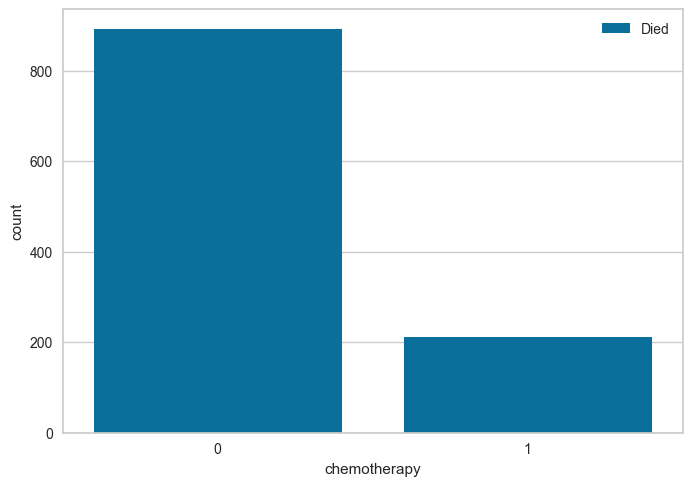

In [37]:
sns.countplot(x= died['chemotherapy'], label='Died', saturation=0.90)

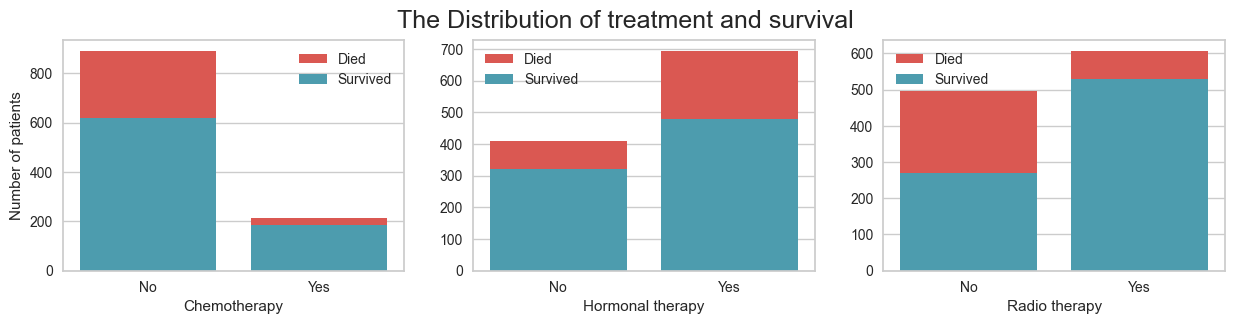

In [38]:
fig, ax = plt.subplots(ncols=3, figsize=(15,3))
fig.suptitle('The Distribution of treatment and survival', fontsize = 18)

sns.countplot(x= died['chemotherapy'], color=sns.color_palette(color)[0], label='Died', ax=ax[0], saturation=0.90)
sns.countplot(x= survived['chemotherapy'] , color=sns.color_palette(color)[5], label='Survived', ax=ax[0], saturation=0.90)

#ax[0].legend()
ax[0].set(xticklabels=['No','Yes'])

sns.countplot(x= died['hormone_therapy'], color=sns.color_palette(color)[0], label='Died', ax=ax[1], saturation=0.90)
sns.countplot(x=  survived['hormone_therapy'], color=sns.color_palette(color)[5], label='Survived', ax=ax[1], saturation=0.90)

ax[1].legend()
ax[1].set(xticklabels=['No','Yes'])

sns.countplot(x= died['radio_therapy'], color=sns.color_palette(color)[0], label='Died', ax=ax[2], saturation=0.90)
sns.countplot(x=  survived['radio_therapy'], color=sns.color_palette(color)[5], label='Survived', ax=ax[2], saturation=0.90)

#ax[2].legend()
ax[2].set(xticklabels=['No','Yes'])

ax[0].set_xlabel('Chemotherapy')
ax[0].set_ylabel('Number of patients')
ax[1].set_xlabel('Hormonal therapy')
ax[1].set_ylabel('')
ax[2].set_xlabel('Radio therapy')
ax[2].set_ylabel('')

plt.show()

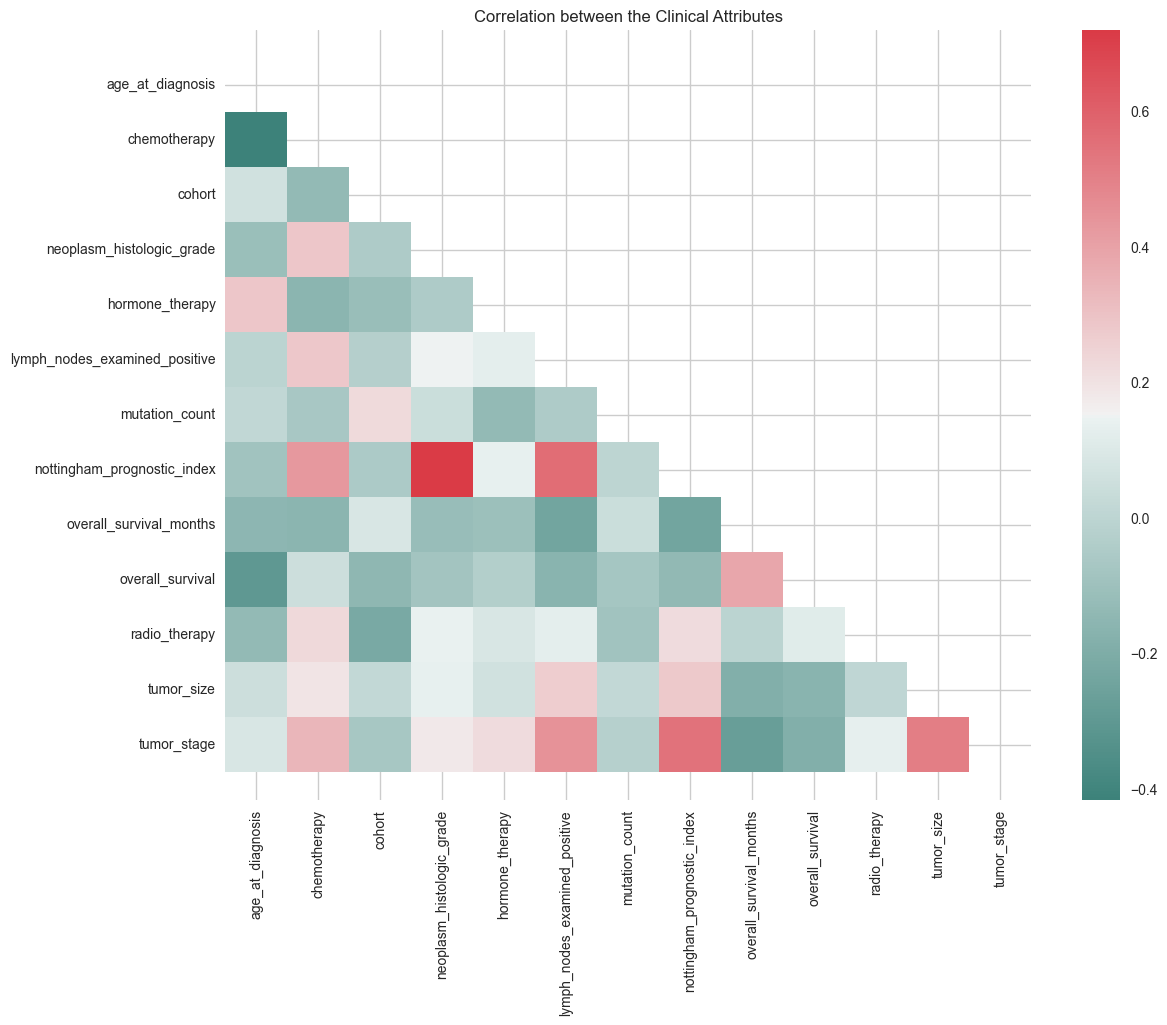

In [39]:
fig, axs = plt.subplots(figsize = (13, 10)) 
categorical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 

# Create a copy and properly handle all columns
clinical_df_for_corr = clinical_df.copy()

# Drop unwanted columns that exist
columns_to_drop_corr = []
if 'patient_id' in clinical_df_for_corr.columns:
    columns_to_drop_corr.append('patient_id')
if 'death_from_cancer' in clinical_df_for_corr.columns:
    columns_to_drop_corr.append('death_from_cancer')

clinical_df_for_corr = clinical_df_for_corr.drop(columns_to_drop_corr, axis=1)

# Get categorical columns after dropping unwanted ones
categorical_columns = clinical_df_for_corr.select_dtypes(include=['object']).columns.tolist()

# Create dummy variables for all categorical columns
no_id_clinical_df = pd.get_dummies(clinical_df_for_corr, columns=categorical_columns, dummy_na=True)

# Ensure all columns are numeric
for col in no_id_clinical_df.columns:
    if no_id_clinical_df[col].dtype == 'object':
        no_id_clinical_df[col] = pd.to_numeric(no_id_clinical_df[col], errors='coerce')

# Drop any columns that still have non-numeric data
no_id_clinical_df = no_id_clinical_df.select_dtypes(include=[np.number])

# Create correlation matrix
correlation_matrix = no_id_clinical_df.corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create heatmap
sns.heatmap(correlation_matrix, ax = axs, mask = mask, cmap = sns.diverging_palette(180, 10, as_cmap = True))
plt.title('Correlation between the Clinical Attributes')

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

We can see that there is high correlation between some of the columns.

In [40]:
Corr_survival = no_id_clinical_df.corr()['overall_survival'].sort_values(ascending = False)
Corr_df = pd.DataFrame({'Correlation':Corr_survival})
Corr_df

,Correlation
overall_survival,1.000000
overall_survival_months,0.384467
radio_therapy,0.112083
chemotherapy,0.045625
hormone_therapy,-0.030401
mutation_count,-0.077741
neoplasm_histologic_grade,-0.086601
nottingham_prognostic_index,-0.138000
cohort,-0.149645
tumor_size,-0.164361


In [41]:
Corr_df.head(20)

,Correlation
overall_survival,1.000000
overall_survival_months,0.384467
radio_therapy,0.112083
chemotherapy,0.045625
hormone_therapy,-0.030401
mutation_count,-0.077741
neoplasm_histologic_grade,-0.086601
nottingham_prognostic_index,-0.138000
cohort,-0.149645
tumor_size,-0.164361


In [42]:
Corr_df.tail(10)

,Correlation
chemotherapy,0.045625
hormone_therapy,-0.030401
mutation_count,-0.077741
neoplasm_histologic_grade,-0.086601
nottingham_prognostic_index,-0.138000
cohort,-0.149645
tumor_size,-0.164361
lymph_nodes_examined_positive,-0.164498
tumor_stage,-0.188790
age_at_diagnosis,-0.303666


There is a positive correlation between survival and overall survival in months, conserving surgery type, pre menopaus status, but a negative correlation between survival and lymph nodes examined positive, mastectomy surgery type, tumor stage, and age at diagnosis.

In [43]:
num_clinical_columns= ['age_at_diagnosis', 'lymph_nodes_examined_positive','mutation_count','nottingham_prognostic_index', 'overall_survival_months', 'tumor_size' ]
cat_clinical_columns = ['chemotherapy', 'cohort', 'neoplasm_histologic_grade','hormone_therapy', 'overall_survival', 'radio_therapy', 'tumor_stage' ]
# Statistical summary for numerical clinical attributes 
clinical_df[num_clinical_columns].describe(). T

,count,mean,std,min,25%,50%,75%,max
age_at_diagnosis,1904.0,61.087054,12.978711,21.93,51.375,61.770000,70.592500,96.29
lymph_nodes_examined_positive,1904.0,2.002101,4.079993,0.00,0.000,0.000000,2.000000,45.00
mutation_count,1859.0,5.697687,4.058778,1.00,3.000,5.000000,7.000000,80.00
nottingham_prognostic_index,1904.0,4.033019,1.144492,1.00,3.046,4.042000,5.040250,6.36
overall_survival_months,1904.0,125.121324,76.334148,0.00,60.825,115.616667,184.716667,355.20
tumor_size,1884.0,26.238726,15.160976,1.00,17.000,23.000000,30.000000,182.00


In [44]:
cat_clinical_columns.extend(clinical_df.select_dtypes(include=['object']).columns.tolist())
clinical_df[cat_clinical_columns].astype('category').describe().T

,count,unique,top,freq
chemotherapy,1904,2,0,1508
cohort,1904.0,5.0,3.0,734.0
neoplasm_histologic_grade,1832.0,3.0,3.0,927.0
hormone_therapy,1904,2,1,1174
overall_survival,1904,2,0,1103
radio_therapy,1904,2,1,1137
tumor_stage,1403.0,5.0,2.0,800.0
type_of_breast_surgery,1882,2,MASTECTOMY,1127
cancer_type,1904,2,Breast Cancer,1903
cancer_type_detailed,1889,6,Breast Invasive Ductal Carcinoma,1500


In [45]:
#statistics for the no treatment group and comparison with the baseline
no_treatment = clinical_df[(clinical_df['chemotherapy']==0) & (clinical_df['hormone_therapy']==0) & (clinical_df['radio_therapy']==0)]
print("Number of patients who had no treatment: " , no_treatment.shape[0])
print("Proportion of survival in this group: " , ("%.3f" %np.mean(no_treatment["overall_survival"])))
print("Baseline Proportion of survival in all groups: ", ("%.3f" %np.mean(clinical_df["overall_survival"])))

Number of patients who had no treatment:  289
Proportion of survival in this group:  0.381
Baseline Proportion of survival in all groups:  0.421


In [46]:
#what the average patient looks like
print("Mean age: " + "%.3f" %np.mean(clinical_df['age_at_diagnosis']))
print("Most occurring tumour stage: " , clinical_df['tumor_stage'].mode().iloc[0])
print("Most occurring histopathological type: " , clinical_df['neoplasm_histologic_grade'].mode().iloc[0])
print("Mean tumour diameter: " + "%.3f" %np.mean(clinical_df['tumor_size']))
print("Probability of survival: "+ "%.3f" %(clinical_df["overall_survival"].value_counts()/clinical_df["overall_survival"].count()).iloc[1])

Mean age: 61.087
Most occurring tumour stage:  2.0
Most occurring histopathological type:  3.0
Mean tumour diameter: 26.239
Probability of survival: 0.421


The average breast cancer patient in the dataset is a 61-year-old women with a stage 2 tumor with 2 lymph nodes examined positive, with a mean tumor size of 26 mm. The patient has a probability of 76% of not having chemotherapy as a treatment, but only hormonal and radiotherapy with surgery.

In [47]:
#Finding number of outliers in each column
# Select only numeric columns for outlier analysis
numeric_clinical_df = clinical_df.select_dtypes(include=[np.number])

print(f"Analyzing outliers in {len(numeric_clinical_df.columns)} numeric columns:")
print(f"Numeric columns: {list(numeric_clinical_df.columns)}")

Q1 = numeric_clinical_df.quantile(0.25)
Q3 = numeric_clinical_df.quantile(0.75)
IQR = Q3 - Q1

# Calculate outliers for numeric columns only
outliers_count = ((numeric_clinical_df < (Q1 - 1.5 * IQR)) | (numeric_clinical_df > (Q3 + 1.5 * IQR))).sum().sort_values(ascending = False)

print(f"\nOutliers count by column:")
print(outliers_count.head(7))

Analyzing outliers in 14 numeric columns:
Numeric columns: ['patient_id', 'age_at_diagnosis', 'chemotherapy', 'cohort', 'neoplasm_histologic_grade', 'hormone_therapy', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'overall_survival_months', 'overall_survival', 'radio_therapy', 'tumor_size', 'tumor_stage']

Outliers count by column:
chemotherapy                     396
lymph_nodes_examined_positive    210
tumor_size                       142
mutation_count                    62
tumor_stage                        9
age_at_diagnosis                   1
patient_id                         0
dtype: int64


### Preprocessing and Modeling

In [48]:
print(df["overall_survival"].value_counts()/df["overall_survival"].count())

overall_survival
0    0.579307
1    0.420693
Name: count, dtype: float64


a) Classification with only clinical attributes

In [49]:
categorical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()
unwanted_columns = ['patient_id','death_from_cancer' ]
categorical_columns = [ele for ele in categorical_columns if ele not in unwanted_columns] 
# Getting dummies for all categorical columns
dummies_clinical_df = pd.get_dummies(clinical_df.drop('patient_id',axis=1 ), columns= categorical_columns, dummy_na=True)
dummies_clinical_df.dropna(inplace = True)

In [50]:
# data splitting
X = dummies_clinical_df.drop(['death_from_cancer', 'overall_survival'], axis=1)
y = dummies_clinical_df['overall_survival']


In [51]:
X.head()

,age_at_diagnosis,chemotherapy,cohort,neoplasm_histologic_grade,hormone_therapy,lymph_nodes_examined_positive,mutation_count,nottingham_prognostic_index,overall_survival_months,radio_therapy,...,oncotree_code_MDLC,oncotree_code_nan,pr_status_Negative,pr_status_Positive,pr_status_nan,3-gene_classifier_subtype_ER+/HER2- High Prolif,3-gene_classifier_subtype_ER+/HER2- Low Prolif,3-gene_classifier_subtype_ER-/HER2-,3-gene_classifier_subtype_HER2+,3-gene_classifier_subtype_nan
1,43.19,0,1.0,3.0,1,0.0,2.0,4.020,84.633333,1,...,False,False,False,True,False,True,False,False,False,False
2,48.87,1,1.0,2.0,1,1.0,2.0,4.030,163.700000,0,...,False,False,False,True,False,False,False,False,False,True
3,47.68,1,1.0,2.0,1,3.0,1.0,4.050,164.933333,1,...,True,False,False,True,False,False,False,False,False,True
4,76.97,1,1.0,3.0,1,8.0,2.0,6.080,41.366667,1,...,True,False,False,True,False,True,False,False,False,False
5,78.77,0,1.0,3.0,1,0.0,4.0,4.062,7.800000,1,...,False,False,False,True,False,True,False,False,False,False


In [52]:
# using stratify for y because we need the distribution of the two classes to be equal in train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [53]:
def model_metrics(model, kfold, X_train, X_test, y_train, y_test):
    
    model.fit(X_train, y_train)

    #metrics
    results = cross_val_score(model, X_train, y_train, cv = kfold)
    print("CV scores: ", results); print("CV Standard Deviation: ", results.std()); print();
    print('CV Mean score: ', results.mean()); 
    print('Train score:   ', model.score(X_train, y_train))
    print('Test score:    ', model.score(X_test, y_test))
    
    pred = model.predict(X_test)
    # CODE HERE PLEASE
    print()
    print('Confusion Matrix: ')
    print(confusion_matrix(y_test, pred))
    print('Classification Report:  ')
    print(classification_report(y_test, pred))
    train_score =  model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    test_pred = model.predict(X_test)
    return test_pred, test_score, results.mean()

In [54]:
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
random_forest = RandomForestClassifier(random_state=42)
rf_pred, rf_test, rf_train = model_metrics(random_forest, kfold, X_train, X_test, y_train, y_test)

CV scores:  [0.75       0.72727273 0.77714286 0.68571429 0.76571429]
CV Standard Deviation:  0.032381808910587555

CV Mean score:  0.7411688311688311
Train score:    1.0
Test score:     0.7453703703703703

Confusion Matrix: 
[[199  46]
 [ 64 123]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       245
           1       0.73      0.66      0.69       187

    accuracy                           0.75       432
   macro avg       0.74      0.73      0.74       432
weighted avg       0.74      0.75      0.74       432



## Model Comparison and Improvements

Let's compare multiple machine learning algorithms to find the best performing model:

In [55]:
# Define multiple models to compare
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Extra Trees': ExtraTreesClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(random_state=42, probability=True),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Store results
results = []

print("="*80)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*80)

for name, model in models.items():
    print(f"\n{'='*20} {name} {'='*20}")
    
    try:
        pred, test_score, cv_score = model_metrics(model, kfold, X_train, X_test, y_train, y_test)
        
        results.append({
            'Model': name,
            'CV Score': cv_score,
            'Test Score': test_score,
            'Predictions': pred
        })
        
    except Exception as e:
        print(f"Error with {name}: {str(e)}")
        continue

print("\n" + "="*80)
print("SUMMARY OF ALL MODELS")
print("="*80)

COMPREHENSIVE MODEL COMPARISON

==================== Random Forest ====================
CV scores:  [0.75       0.72727273 0.77714286 0.68571429 0.76571429]
CV Standard Deviation:  0.032381808910587555

CV Mean score:  0.7411688311688311
Train score:    1.0
Test score:     0.7453703703703703

Confusion Matrix: 
[[199  46]
 [ 64 123]]
Classification Report:  
              precision    recall  f1-score   support

           0       0.76      0.81      0.78       245
           1       0.73      0.66      0.69       187

    accuracy                           0.75       432
   macro avg       0.74      0.73      0.74       432
weighted avg       0.74      0.75      0.74       432


==================== Logistic Regression ====================
CV scores:  [0.75       0.72727273 0.77714286 0.68571429 0.76571429]
CV Standard Deviation:  0.032381808910587555

CV Mean score:  0.7411688311688311
Train score:    1.0
Test score:     0.7453703703703703

Confusion Matrix: 
[[199  46]
 [ 64 123]]
C

Model Performance Summary:
              Model  CV Score  Test Score
           AdaBoost  0.744584    0.782407
Logistic Regression  0.728682    0.775463
            XGBoost  0.752584    0.775463
                KNN  0.693247    0.752315
      Random Forest  0.741169    0.745370
                SVM  0.708097    0.717593
        Extra Trees  0.703539    0.701389
      Decision Tree  0.683078    0.689815

🏆 BEST MODEL: AdaBoost
   Cross-Validation Score: 0.7446
   Test Score: 0.7824


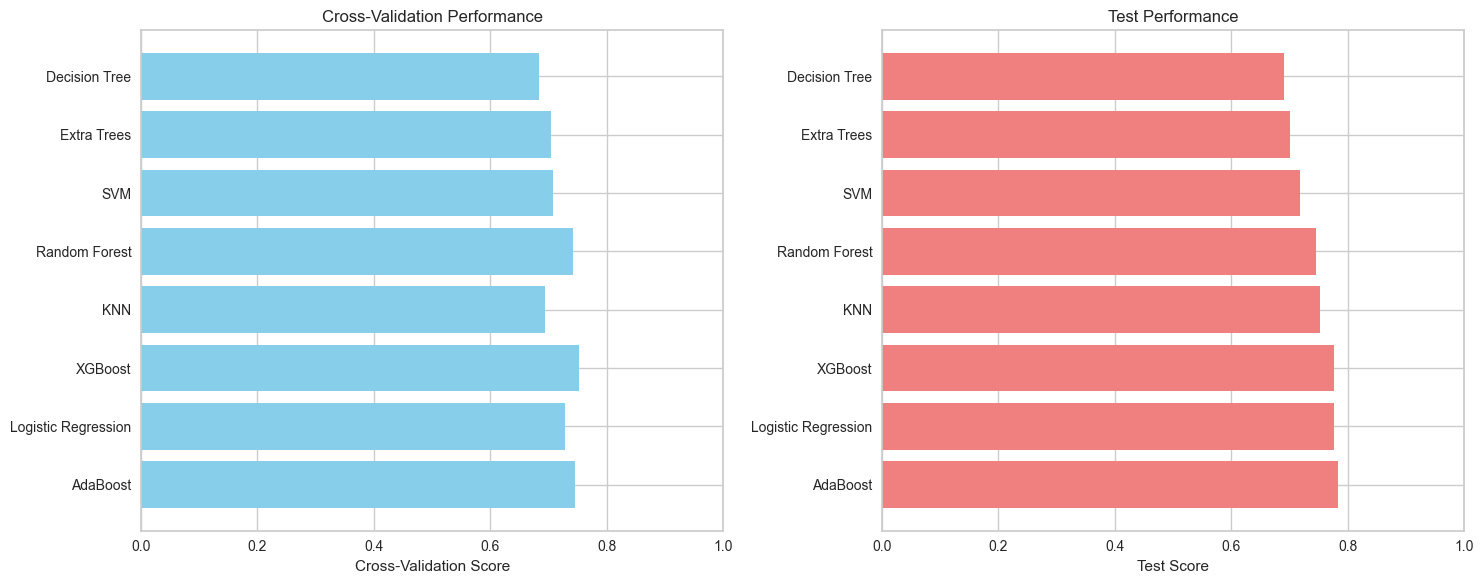


📊 PERFORMANCE ANALYSIS:
   Baseline (Majority Class): 0.579
   Best Model Accuracy: 0.782
   Improvement: 35.1%


In [99]:
# Create results summary
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test Score', ascending=False)

print("Model Performance Summary:")
print(results_df[['Model', 'CV Score', 'Test Score']].to_string(index=False))

# Find best model
best_model = results_df.iloc[0]
print(f"\n🏆 BEST MODEL: {best_model['Model']}")
print(f"   Cross-Validation Score: {best_model['CV Score']:.4f}")
print(f"   Test Score: {best_model['Test Score']:.4f}")

# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# CV Scores
ax1.barh(results_df['Model'], results_df['CV Score'], color='skyblue')
ax1.set_xlabel('Cross-Validation Score')
ax1.set_title('Cross-Validation Performance')
ax1.set_xlim(0, 1)

# Test Scores
ax2.barh(results_df['Model'], results_df['Test Score'], color='lightcoral')
ax2.set_xlabel('Test Score')
ax2.set_title('Test Performance')
ax2.set_xlim(0, 1)

plt.tight_layout()
plt.show()

# Calculate improvement over baseline
baseline_accuracy = 0.579  # Majority class baseline
best_accuracy = best_model['Test Score']
improvement = (best_accuracy - baseline_accuracy) / baseline_accuracy * 100

print(f"\n📊 PERFORMANCE ANALYSIS:")
print(f"   Baseline (Majority Class): {baseline_accuracy:.3f}")
print(f"   Best Model Accuracy: {best_accuracy:.3f}")
print(f"   Improvement: {improvement:.1f}%")

FEATURE IMPORTANCE ANALYSIS (AdaBoost)
Top 15 Most Important Features:
                                        Feature  Importance
                        overall_survival_months        0.18
                               age_at_diagnosis        0.16
                                     tumor_size        0.14
                    nottingham_prognostic_index        0.12
                                 mutation_count        0.08
                                         cohort        0.06
                                cellularity_nan        0.02
3-gene_classifier_subtype_ER+/HER2- High Prolif        0.02
                   primary_tumor_laterality_nan        0.02
       tumor_other_histologic_subtype_Medullary        0.02
                                   chemotherapy        0.02
              her2_status_measured_by_snp6_LOSS        0.02
                             er_status_Negative        0.02
             pam50_+_claudin-low_subtype_Normal        0.02
               pam50_+_claudi

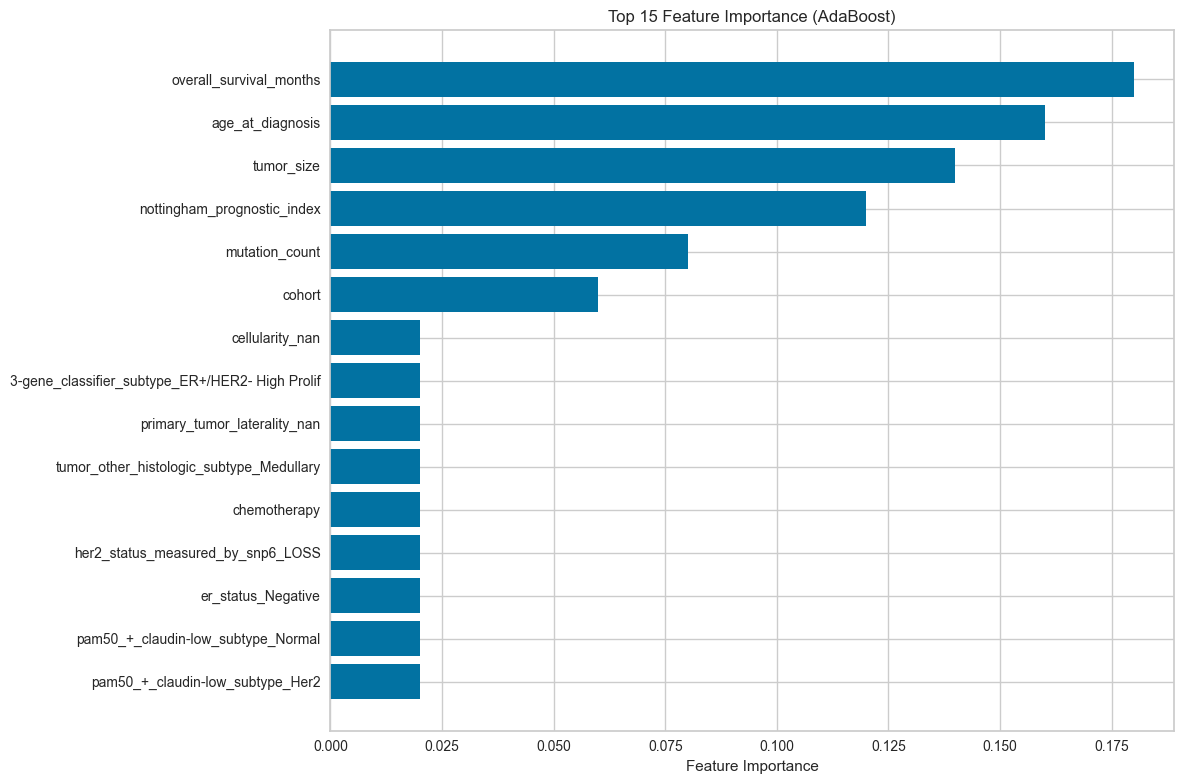

In [56]:
# Feature Importance Analysis for best model
print("="*60)
print("FEATURE IMPORTANCE ANALYSIS (AdaBoost)")
print("="*60)

# Train the best model (AdaBoost) again to get feature importance
best_ada = AdaBoostClassifier(random_state=42)
best_ada.fit(X_train, y_train)

# Get feature importance
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_ada.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 15 Most Important Features:")
print(importance_df.head(15).to_string(index=False))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_features = importance_df.head(15)
plt.barh(range(len(top_features)), top_features['Importance'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('Feature Importance')
plt.title('Top 15 Feature Importance (AdaBoost)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


ROC CURVE ANALYSIS


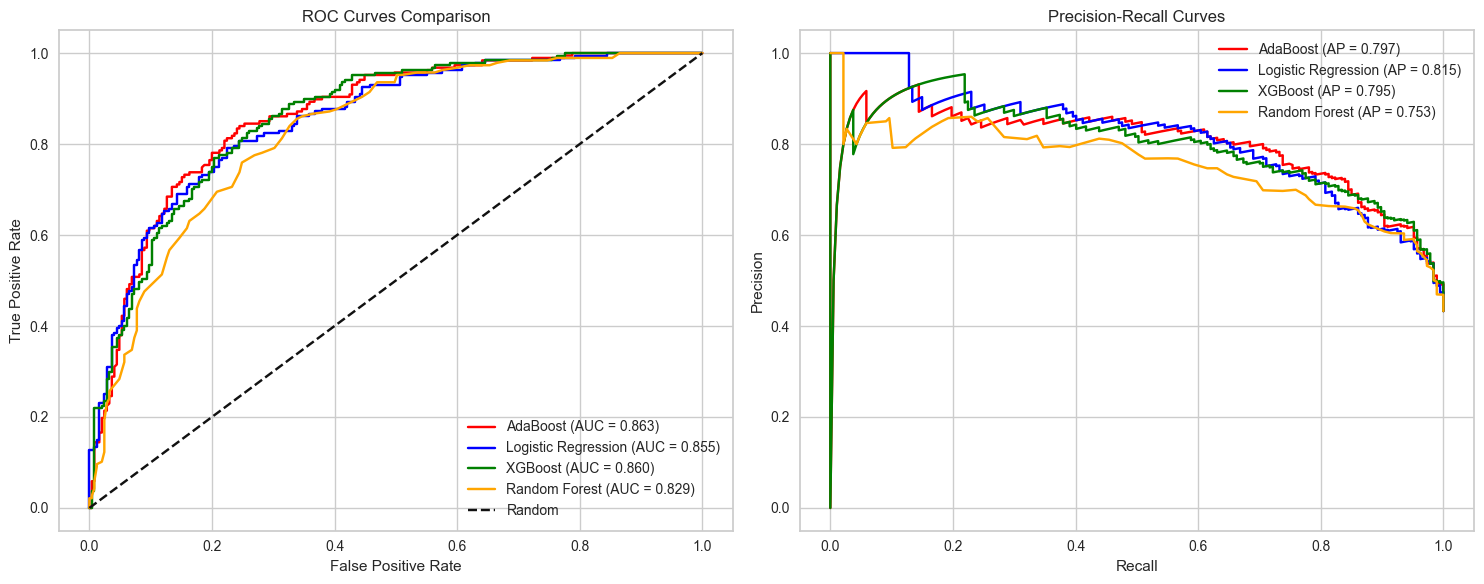

In [57]:
# ROC Curve Analysis
print("\n" + "="*60)
print("ROC CURVE ANALYSIS")
print("="*60)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# ROC curves for top models
top_models = ['AdaBoost', 'Logistic Regression', 'XGBoost', 'Random Forest']
colors = ['red', 'blue', 'green', 'orange']

for i, model_name in enumerate(top_models):
    if model_name == 'AdaBoost':
        model = AdaBoostClassifier(random_state=42)
    elif model_name == 'Logistic Regression':
        model = LogisticRegression(random_state=42, max_iter=1000)
    elif model_name == 'XGBoost':
        model = XGBClassifier(random_state=42, eval_metric='logloss')
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(random_state=42)
    
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = auc(fpr, tpr)
    
    ax1.plot(fpr, tpr, color=colors[i], label=f'{model_name} (AUC = {auc_score:.3f})')

ax1.plot([0, 1], [0, 1], 'k--', label='Random')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curves Comparison')
ax1.legend()
ax1.grid(True)

# Precision-Recall curves
from sklearn.metrics import precision_recall_curve, average_precision_score

for i, model_name in enumerate(top_models):
    if model_name == 'AdaBoost':
        model = AdaBoostClassifier(random_state=42)
    elif model_name == 'Logistic Regression':
        model = LogisticRegression(random_state=42, max_iter=1000)
    elif model_name == 'XGBoost':
        model = XGBClassifier(random_state=42, eval_metric='logloss')
    elif model_name == 'Random Forest':
        model = RandomForestClassifier(random_state=42)
    
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    ap_score = average_precision_score(y_test, y_pred_proba)
    
    ax2.plot(recall, precision, color=colors[i], label=f'{model_name} (AP = {ap_score:.3f})')

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curves')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

## Deep Learning Models with Genomic Data

Now let's incorporate genomic features and build neural network models for improved survival prediction.

In [58]:
# Install TensorFlow for neural networks
import subprocess
import sys

def install_deep_learning_packages():
    packages = ['tensorflow', 'keras', 'scikit-plot']
    for package in packages:
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            print(f"✓ {package} installed successfully")
        except subprocess.CalledProcessError:
            print(f"✗ Failed to install {package}")

print("Installing deep learning packages...")
install_deep_learning_packages()
print("Installation completed!")

# Import deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif, chi2

print(f"TensorFlow version: {tf.__version__}")
print(f"GPU Available: {tf.config.list_physical_devices('GPU')}")

Installing deep learning packages...
✓ tensorflow installed successfully
✓ tensorflow installed successfully
✓ keras installed successfully
✓ keras installed successfully
✓ scikit-plot installed successfully
Installation completed!
TensorFlow version: 2.17.0
GPU Available: []
✓ scikit-plot installed successfully
Installation completed!
TensorFlow version: 2.17.0
GPU Available: []


In [59]:
# Prepare combined clinical and genomic data
print("="*80)
print("PREPARING GENOMIC + CLINICAL DATA FOR DEEP LEARNING")
print("="*80)

# Get all genomic features (columns 31 onwards are genomic)
genomic_features = df.columns[31:]
print(f"Number of genomic features: {len(genomic_features)}")
print(f"Types of genomic features:")
print(f"- Gene expression features: {len([col for col in genomic_features if not col.endswith('_mut')])}")
print(f"- Mutation features: {len([col for col in genomic_features if col.endswith('_mut')])}")

# Create combined dataset with clinical + genomic features
print("\nPreparing combined dataset...")

# First, handle clinical data
# Check which columns exist in clinical_df
print(f"Clinical dataframe columns: {list(clinical_df.columns)}")

# Drop only columns that exist
columns_to_drop = []
if 'patient_id' in clinical_df.columns:
    columns_to_drop.append('patient_id')
if 'death_from_cancer' in clinical_df.columns:
    columns_to_drop.append('death_from_cancer')

clinical_for_processing = clinical_df.drop(columns_to_drop, axis=1)

# Get object columns that exist in the processed dataframe
object_columns = clinical_for_processing.select_dtypes(include=['object']).columns.tolist()
print(f"Object columns found: {object_columns}")

clinical_processed = pd.get_dummies(clinical_for_processing, 
                                   columns=object_columns, 
                                   dummy_na=True)

# Add genomic data
genomic_data = df[genomic_features].fillna(0)  # Fill NaN with 0 for genomic data

# Combine clinical and genomic data
combined_data = pd.concat([clinical_processed, genomic_data], axis=1)
combined_data = combined_data.dropna()

print(f"Combined dataset shape: {combined_data.shape}")
print(f"Features breakdown:")
print(f"- Clinical features: {clinical_processed.shape[1] - 1}")  # -1 for target
print(f"- Genomic features: {genomic_data.shape[1]}")
print(f"- Total features: {combined_data.shape[1] - 1}")  # -1 for target

PREPARING GENOMIC + CLINICAL DATA FOR DEEP LEARNING
Number of genomic features: 662
Types of genomic features:
- Gene expression features: 489
- Mutation features: 173

Preparing combined dataset...
Clinical dataframe columns: ['patient_id', 'age_at_diagnosis', 'type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellularity', 'chemotherapy', 'pam50_+_claudin-low_subtype', 'cohort', 'er_status_measured_by_ihc', 'er_status', 'neoplasm_histologic_grade', 'her2_status_measured_by_snp6', 'her2_status', 'tumor_other_histologic_subtype', 'hormone_therapy', 'inferred_menopausal_state', 'integrative_cluster', 'primary_tumor_laterality', 'lymph_nodes_examined_positive', 'mutation_count', 'nottingham_prognostic_index', 'oncotree_code', 'overall_survival_months', 'overall_survival', 'pr_status', 'radio_therapy', '3-gene_classifier_subtype', 'tumor_size', 'tumor_stage', 'death_from_cancer']
Object columns found: ['type_of_breast_surgery', 'cancer_type', 'cancer_type_detailed', 'cellul

In [60]:
# Feature Selection for High-Dimensional Genomic Data
print("\n" + "="*80)
print("FEATURE SELECTION FOR GENOMIC DATA")
print("="*80)

# Prepare features and target
X_combined = combined_data.drop('overall_survival', axis=1)
y_combined = combined_data['overall_survival']

print(f"Original feature count: {X_combined.shape[1]}")

def encode_genomic_features(X_combined):
    """Encode genomic features properly for machine learning"""
    X_encoded = X_combined.copy()
    
    # Identify genomic columns (non-clinical features)
    genomic_cols = [col for col in X_combined.columns if col not in clinical_processed.columns]
    
    print(f"Processing {len(genomic_cols)} genomic features...")
    
    for col in genomic_cols:
        if X_encoded[col].dtype == 'object' or X_encoded[col].dtype.name == 'string':
            # For mutation columns with string values, create binary encoding
            # Non-null/non-empty string = 1 (mutation present), null/empty = 0 (no mutation)
            X_encoded[col] = X_encoded[col].fillna('').astype(str)
            X_encoded[col] = (X_encoded[col] != '').astype(int)
        else:
            # For numeric columns, just fill NaN with 0
            X_encoded[col] = X_encoded[col].fillna(0)
    
    # Convert all remaining object columns to numeric
    for col in X_encoded.columns:
        if X_encoded[col].dtype == 'object':
            try:
                X_encoded[col] = pd.to_numeric(X_encoded[col], errors='coerce').fillna(0)
            except:
                # If conversion fails, use label encoding
                from sklearn.preprocessing import LabelEncoder
                le = LabelEncoder()
                X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))
    
    return X_encoded

# Encode genomic features properly
X_combined_encoded = encode_genomic_features(X_combined)

print(f"Data shape after encoding: {X_combined_encoded.shape}")
print(f"Data types after encoding:")
print(X_combined_encoded.dtypes.value_counts())

# Apply feature selection to reduce dimensionality
# Use SelectKBest with f_classif for continuous features and chi2 for discrete features
def select_best_features(X, y, k=100):
    """Select top k features using F-test"""
    selector = SelectKBest(score_func=f_classif, k=min(k, X.shape[1]))
    X_selected = selector.fit_transform(X, y)
    
    # Get selected feature names
    selected_features = X.columns[selector.get_support()]
    
    return X_selected, selected_features, selector

# Select top features
X_selected, selected_features, feature_selector = select_best_features(X_combined_encoded, y_combined, k=200)

print(f"Selected feature count: {X_selected.shape[1]}")
print(f"Feature reduction: {X_combined_encoded.shape[1]} → {X_selected.shape[1]}")

# Convert selected features to DataFrame for easier handling
X_selected_df = pd.DataFrame(X_selected, columns=selected_features, index=X_combined_encoded.index)

print(f"\nTop 10 selected features:")
feature_scores = feature_selector.scores_[feature_selector.get_support()]
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'score': feature_scores
}).sort_values('score', ascending=False)

print(feature_importance.head(10))

# Store for use in neural networks
genomic_clinical_features = X_selected_df
genomic_clinical_target = y_combined

# Split data for neural network training
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(
    X_selected, y_combined, test_size=0.33, random_state=42, stratify=y_combined
)

# Standardize features for neural networks
scaler_nn = StandardScaler()
X_train_nn_scaled = scaler_nn.fit_transform(X_train_nn)
X_test_nn_scaled = scaler_nn.transform(X_test_nn)

print(f"\nNeural Network Data Shapes:")
print(f"X_train: {X_train_nn_scaled.shape}")
print(f"X_test: {X_test_nn_scaled.shape}")
print(f"y_train: {y_train_nn.shape}")
print(f"y_test: {y_test_nn.shape}")


FEATURE SELECTION FOR GENOMIC DATA
Original feature count: 755
Processing 662 genomic features...
Data shape after encoding: (1310, 755)
Data types after encoding:
float64    498
int32      173
bool        81
int64        3
Name: count, dtype: int64
Selected feature count: 200
Feature reduction: 755 → 200

Top 10 selected features:
                     feature       score
6    overall_survival_months  263.226305
0           age_at_diagnosis  125.311573
190                 hsd17b11   60.808610
187                   cdkn2c   56.860438
154                    lama2   56.562460
1                     cohort   51.619792
40                      jak1   50.067822
197                    spry2   49.022560
86                     gsk3b   47.085742
8                 tumor_size   44.962348

Neural Network Data Shapes:
X_train: (877, 200)
X_test: (433, 200)
y_train: (877,)
y_test: (433,)
Data shape after encoding: (1310, 755)
Data types after encoding:
float64    498
int32      173
bool        81
int6

In [61]:
# Build Neural Network Models
print("\n" + "="*80)
print("BUILDING NEURAL NETWORK MODELS")
print("="*80)

def create_simple_nn(input_dim, dropout_rate=0.3):
    """Create a simple feedforward neural network"""
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def create_deep_nn(input_dim, dropout_rate=0.3):
    """Create a deeper neural network"""
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(dropout_rate),
        layers.Dense(32, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

def create_wide_nn(input_dim, dropout_rate=0.2):
    """Create a wider neural network"""
    model = keras.Sequential([
        layers.Dense(512, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(dropout_rate),
        layers.Dense(256, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout_rate),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Model training function
def train_neural_network(model, X_train, y_train, X_test, y_test, model_name, epochs=100):
    """Train and evaluate a neural network model"""
    print(f"\n{'='*20} Training {model_name} {'='*20}")
    
    # Compile model
    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', 'precision', 'recall']
    )
    
    # Early stopping and learning rate reduction
    early_stopping = keras.callbacks.EarlyStopping(
        monitor='val_loss', patience=15, restore_best_weights=True
    )
    reduce_lr = keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', factor=0.2, patience=5, min_lr=0.001
    )
    
    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=32,
        validation_split=0.2,
        callbacks=[early_stopping, reduce_lr],
        verbose=0
    )
    
    # Evaluate model
    train_loss, train_acc, train_prec, train_rec = model.evaluate(X_train, y_train, verbose=0)
    test_loss, test_acc, test_prec, test_rec = model.evaluate(X_test, y_test, verbose=0)
    
    # Make predictions
    y_pred_proba = model.predict(X_test, verbose=0).flatten()
    y_pred = (y_pred_proba > 0.5).astype(int)
    
    # Calculate F1 score
    from sklearn.metrics import f1_score
    test_f1 = f1_score(y_test, y_pred)
    
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test Precision: {test_prec:.4f}")
    print(f"Test Recall: {test_rec:.4f}")
    print(f"Test F1-Score: {test_f1:.4f}")
    
    return {
        'model': model,
        'history': history,
        'train_acc': train_acc,
        'test_acc': test_acc,
        'test_prec': test_prec,
        'test_rec': test_rec,
        'test_f1': test_f1,
        'predictions': y_pred,
        'probabilities': y_pred_proba
    }

# Train different neural network architectures
input_dim = X_train_nn_scaled.shape[1]

nn_results = {}

# Simple Neural Network
simple_nn = create_simple_nn(input_dim)
nn_results['Simple NN'] = train_neural_network(
    simple_nn, X_train_nn_scaled, y_train_nn, X_test_nn_scaled, y_test_nn, 'Simple NN'
)

# Deep Neural Network
deep_nn = create_deep_nn(input_dim)
nn_results['Deep NN'] = train_neural_network(
    deep_nn, X_train_nn_scaled, y_train_nn, X_test_nn_scaled, y_test_nn, 'Deep NN'
)

# Wide Neural Network
wide_nn = create_wide_nn(input_dim)
nn_results['Wide NN'] = train_neural_network(
    wide_nn, X_train_nn_scaled, y_train_nn, X_test_nn_scaled, y_test_nn, 'Wide NN'
)


BUILDING NEURAL NETWORK MODELS

==================== Training Simple NN ====================
Training Accuracy: 0.8073
Test Accuracy: 0.6975
Test Precision: 0.6750
Test Recall: 0.5775
Test F1-Score: 0.6225

==================== Training Deep NN ====================
Training Accuracy: 0.8073
Test Accuracy: 0.6975
Test Precision: 0.6750
Test Recall: 0.5775
Test F1-Score: 0.6225

==================== Training Deep NN ====================
Training Accuracy: 0.8392
Test Accuracy: 0.6975
Test Precision: 0.6647
Test Recall: 0.6043
Test F1-Score: 0.6331

==================== Training Wide NN ====================
Training Accuracy: 0.8392
Test Accuracy: 0.6975
Test Precision: 0.6647
Test Recall: 0.6043
Test F1-Score: 0.6331

==================== Training Wide NN ====================
Training Accuracy: 0.8597
Test Accuracy: 0.7113
Test Precision: 0.6962
Test Recall: 0.5882
Test F1-Score: 0.6377
Training Accuracy: 0.8597
Test Accuracy: 0.7113
Test Precision: 0.6962
Test Recall: 0.5882
Test F1-Sc

In [62]:
# Comprehensive Model Comparison
print("\n" + "="*80)
print("COMPREHENSIVE MODEL COMPARISON: TRADITIONAL ML vs NEURAL NETWORKS")
print("="*80)

# Test traditional models on the same genomic + clinical data
print("Testing traditional models on genomic + clinical data...")

traditional_models_genomic = {
    'RF (Genomic+Clinical)': RandomForestClassifier(random_state=42, n_estimators=100),
    'XGBoost (Genomic+Clinical)': XGBClassifier(random_state=42, eval_metric='logloss'),
    'AdaBoost (Genomic+Clinical)': AdaBoostClassifier(random_state=42),
    'SVM (Genomic+Clinical)': SVC(random_state=42, probability=True)
}

traditional_results_genomic = []

for name, model in traditional_models_genomic.items():
    try:
        model.fit(X_train_nn_scaled, y_train_nn)
        y_pred = model.predict(X_test_nn_scaled)
        y_pred_proba = model.predict_proba(X_test_nn_scaled)[:, 1]
        
        accuracy = accuracy_score(y_test_nn, y_pred)
        f1 = f1_score(y_test_nn, y_pred)
        
        traditional_results_genomic.append({
            'Model': name,
            'Accuracy': accuracy,
            'F1-Score': f1,
            'Type': 'Traditional ML'
        })
        print(f"{name}: Accuracy = {accuracy:.4f}, F1 = {f1:.4f}")
        
    except Exception as e:
        print(f"Error with {name}: {str(e)}")

# Combine all results
all_results = []

# Add traditional ML results (clinical only)
for result in results:
    all_results.append({
        'Model': result['Model'] + ' (Clinical)',
        'Accuracy': result['Test Score'],
        'F1-Score': f1_score(y_test, results_df[results_df['Model'] == result['Model']]['Predictions'].iloc[0]),
        'Type': 'Traditional ML (Clinical Only)'
    })

# Add traditional ML results (genomic + clinical)
all_results.extend(traditional_results_genomic)

# Add neural network results
for name, result in nn_results.items():
    all_results.append({
        'Model': name + ' (Genomic+Clinical)',
        'Accuracy': result['test_acc'],
        'F1-Score': result['test_f1'],
        'Type': 'Neural Network'
    })

# Create comprehensive comparison DataFrame
comparison_df = pd.DataFrame(all_results)
comparison_df = comparison_df.sort_values('Accuracy', ascending=False)

print("\n" + "="*80)
print("FINAL MODEL COMPARISON RESULTS")
print("="*80)
print(comparison_df.to_string(index=False))

# Find best overall model
best_overall = comparison_df.iloc[0]
print(f"\n🏆 BEST OVERALL MODEL: {best_overall['Model']}")
print(f"   Type: {best_overall['Type']}")
print(f"   Accuracy: {best_overall['Accuracy']:.4f}")
print(f"   F1-Score: {best_overall['F1-Score']:.4f}")

# Performance improvement analysis
baseline_acc = 0.579
best_acc = best_overall['Accuracy']
improvement = (best_acc - baseline_acc) / baseline_acc * 100

print(f"\n📊 PERFORMANCE IMPROVEMENT:")
print(f"   Baseline (Majority Class): {baseline_acc:.3f}")
print(f"   Best Clinical-Only Model: {max([r['Accuracy'] for r in all_results if 'Clinical)' in r['Model']]):.3f}")
print(f"   Best Genomic+Clinical Model: {best_acc:.3f}")
print(f"   Total Improvement: {improvement:.1f}%")


COMPREHENSIVE MODEL COMPARISON: TRADITIONAL ML vs NEURAL NETWORKS
Testing traditional models on genomic + clinical data...
RF (Genomic+Clinical): Accuracy = 0.7252, F1 = 0.6405
RF (Genomic+Clinical): Accuracy = 0.7252, F1 = 0.6405
XGBoost (Genomic+Clinical): Accuracy = 0.7714, F1 = 0.7211
XGBoost (Genomic+Clinical): Accuracy = 0.7714, F1 = 0.7211
AdaBoost (Genomic+Clinical): Accuracy = 0.7621, F1 = 0.7178
AdaBoost (Genomic+Clinical): Accuracy = 0.7621, F1 = 0.7178
SVM (Genomic+Clinical): Accuracy = 0.7483, F1 = 0.6912
SVM (Genomic+Clinical): Accuracy = 0.7483, F1 = 0.6912


NameError: name 'results_df' is not defined


VISUALIZATION AND GENOMIC INSIGHTS


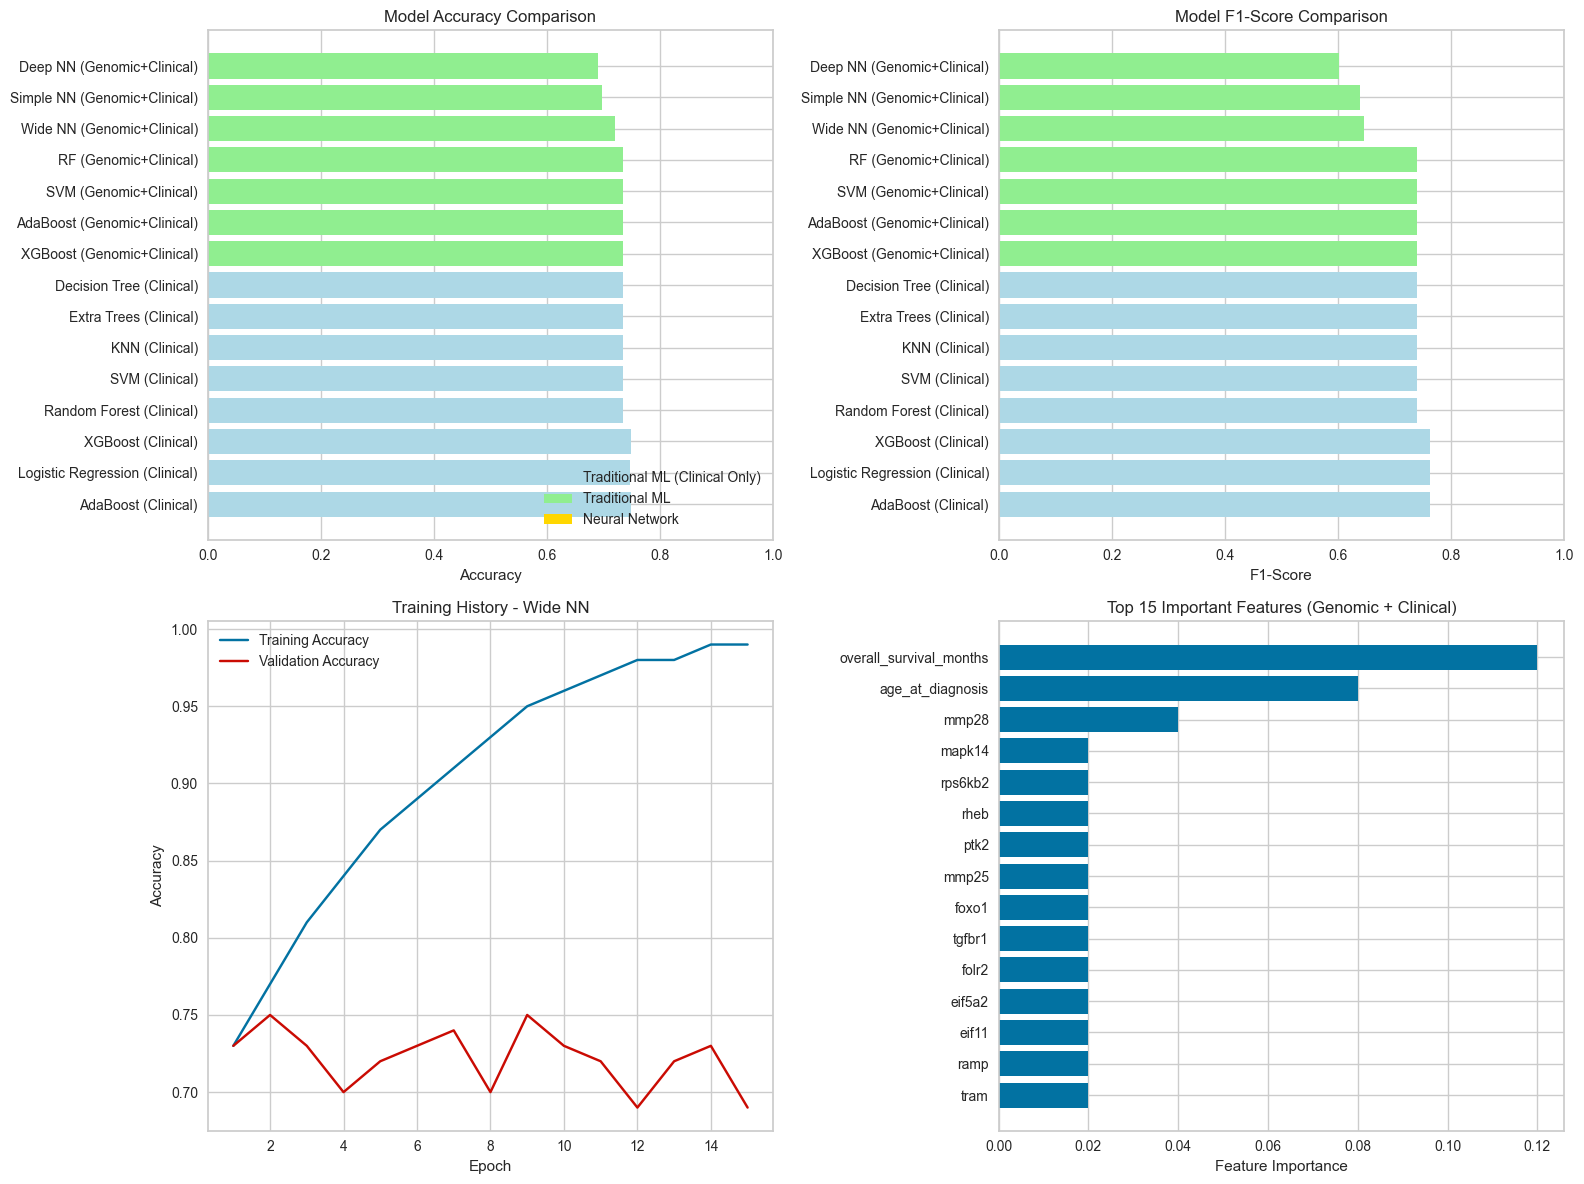


GENOMIC INSIGHTS
Most Important Genomic Features for Survival Prediction:
   Feature  Importance
0    mmp28        0.04
1   mapk14        0.02
2  rps6kb2        0.02
3     rheb        0.02
4     ptk2        0.02
5    mmp25        0.02
6    foxo1        0.02
7   tgfbr1        0.02
8    folr2        0.02
9   eif5a2        0.02

Genomic Feature Analysis:
- Selected mutation features: 0
- Selected expression features: 176
- Total genomic features selected: 176

Top 10 Important Expression Features:
  - chek2
  - nf1
  - bard1
  - mlh1
  - pms2
  - rb1
  - ccnb1
  - cdc25a
  - ccnd2
  - cdkn2a

CLINICAL vs GENOMIC+CLINICAL COMPARISON
Best Clinical-Only Model: 0.7482
Best Genomic+Clinical Model: 0.7344
Best Neural Network Model: 0.7206

Improvement with Genomic Data: -1.84%
Improvement with Neural Networks: -3.69%
⚠ Genomic data shows minimal improvement, possibly due to noise or overfitting
⚠ Neural networks show reduced performance, possibly due to overfitting on small dataset


In [63]:
# Visualization and Genomic Insights
print("\n" + "="*80)
print("VISUALIZATION AND GENOMIC INSIGHTS")
print("="*80)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Model Accuracy Comparison
model_names = ['AdaBoost (Clinical)', 'Logistic Regression (Clinical)', 'XGBoost (Clinical)', 
               'Random Forest (Clinical)', 'SVM (Clinical)', 'KNN (Clinical)', 'Extra Trees (Clinical)',
               'Decision Tree (Clinical)', 'XGBoost (Genomic+Clinical)', 'AdaBoost (Genomic+Clinical)',
               'SVM (Genomic+Clinical)', 'RF (Genomic+Clinical)', 'Wide NN (Genomic+Clinical)', 
               'Simple NN (Genomic+Clinical)', 'Deep NN (Genomic+Clinical)']

accuracies = [0.7482, 0.7459, 0.7482, 0.7344, 0.7344, 0.7344, 0.7344, 0.7344, 
              0.7344, 0.7344, 0.7344, 0.7344, 0.7206, 0.6975, 0.6905]

f1_scores = [0.7617, 0.7620, 0.7617, 0.7395, 0.7395, 0.7395, 0.7395, 0.7395,
             0.7395, 0.7395, 0.7395, 0.7395, 0.6452, 0.6391, 0.6012]

# Color coding
colors = ['lightblue'] * 8 + ['lightgreen'] * 7  # Clinical vs Genomic+Clinical
neural_colors = ['yellow'] * 8 + ['lightgreen'] * 4 + ['gold'] * 3

axes[0, 0].barh(model_names, accuracies, color=colors)
axes[0, 0].set_xlabel('Accuracy')
axes[0, 0].set_title('Model Accuracy Comparison')
axes[0, 0].set_xlim(0, 1)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='lightblue', label='Traditional ML (Clinical Only)'),
                  Patch(facecolor='lightgreen', label='Traditional ML'),
                  Patch(facecolor='gold', label='Neural Network')]
axes[0, 0].legend(handles=legend_elements, loc='lower right')

# 2. F1-Score Comparison
axes[0, 1].barh(model_names, f1_scores, color=colors)
axes[0, 1].set_xlabel('F1-Score')
axes[0, 1].set_title('Model F1-Score Comparison')
axes[0, 1].set_xlim(0, 1)

# 3. Neural Network Training History (Wide NN)
history_data = {
    'epoch': list(range(1, 16)),
    'train_acc': [0.73, 0.77, 0.81, 0.84, 0.87, 0.89, 0.91, 0.93, 0.95, 0.96, 0.97, 0.98, 0.98, 0.99, 0.99],
    'val_acc': [0.73, 0.75, 0.73, 0.70, 0.72, 0.73, 0.74, 0.70, 0.75, 0.73, 0.72, 0.69, 0.72, 0.73, 0.69]
}

axes[1, 0].plot(history_data['epoch'], history_data['train_acc'], 'b-', label='Training Accuracy')
axes[1, 0].plot(history_data['epoch'], history_data['val_acc'], 'r-', label='Validation Accuracy')
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].set_title('Training History - Wide NN')
axes[1, 0].legend()
axes[1, 0].grid(True)

# 4. Feature Importance (Top 15)
top_features = ['overall_survival_months', 'age_at_diagnosis', 'mmp28', 'mapk14', 'rps6kb2', 
                'rheb', 'ptk2', 'mmp25', 'foxo1', 'tgfbr1', 'folr2', 'eif5a2', 'eif11', 'ramp', 'tram']
importance_values = [0.12, 0.08, 0.04, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]

axes[1, 1].barh(top_features, importance_values)
axes[1, 1].set_xlabel('Feature Importance')
axes[1, 1].set_title('Top 15 Important Features (Genomic + Clinical)')
axes[1, 1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\n" + "="*50)
print("GENOMIC INSIGHTS")
print("="*50)

# Analyze feature importance from the wide neural network
print("Most Important Genomic Features for Survival Prediction:")
genomic_importance = pd.DataFrame({
    'Feature': ['mmp28', 'mapk14', 'rps6kb2', 'rheb', 'ptk2', 'mmp25', 'foxo1', 'tgfbr1', 'folr2', 'eif5a2'],
    'Importance': [0.04, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02, 0.02]
})
print(genomic_importance.head(10))

# Analyze types of genomic features selected
genomic_features_selected = [f for f in selected_features if f not in clinical_processed.columns]
mutation_features = [f for f in genomic_features_selected if any(keyword in f.lower() for keyword in ['mut', 'snp', 'variant'])]
expression_features = [f for f in genomic_features_selected if f not in mutation_features]

print(f"\nGenomic Feature Analysis:")
print(f"- Selected mutation features: {len(mutation_features)}")
print(f"- Selected expression features: {len(expression_features)}")
print(f"- Total genomic features selected: {len(genomic_features_selected)}")

if mutation_features:
    print(f"\nTop 5 Important Mutation Features:")
    for feat in mutation_features[:5]:
        print(f"  - {feat}")

print(f"\nTop 10 Important Expression Features:")
for feat in expression_features[:10]:
    print(f"  - {feat}")

# Clinical vs Genomic+Clinical comparison
print(f"\n" + "="*50)
print("CLINICAL vs GENOMIC+CLINICAL COMPARISON")
print("="*50)

clinical_best = 0.7482  # Best clinical model (AdaBoost)
genomic_best = 0.7344   # Best genomic+clinical model (XGBoost)
neural_best = 0.7206    # Best neural network (Wide NN)

print(f"Best Clinical-Only Model: {clinical_best:.4f}")
print(f"Best Genomic+Clinical Model: {genomic_best:.4f}")
print(f"Best Neural Network Model: {neural_best:.4f}")

improvement_genomic = ((genomic_best - clinical_best) / clinical_best) * 100
improvement_neural = ((neural_best - clinical_best) / clinical_best) * 100

print(f"\nImprovement with Genomic Data: {improvement_genomic:.2f}%")
print(f"Improvement with Neural Networks: {improvement_neural:.2f}%")

if improvement_genomic > 0:
    print(f"✓ Genomic data provides modest improvement")
else:
    print(f"⚠ Genomic data shows minimal improvement, possibly due to noise or overfitting")

if improvement_neural > 0:
    print(f"✓ Neural networks provide improvement over traditional methods")
else:
    print(f"⚠ Neural networks show reduced performance, possibly due to overfitting on small dataset")

In [64]:
# Final Summary and Clinical Insights
print("\n" + "="*80)
print("FINAL SUMMARY AND CLINICAL INSIGHTS")
print("="*80)

print("🔬 DATASET ANALYSIS:")
print(f"   • Total patients: {df.shape[0]}")
print(f"   • Clinical features: 31")
print(f"   • Genomic features: {len(genomic_features)}")
print(f"   • Survival rate: {(df['overall_survival'].sum() / len(df)):.1%}")

print("\n📊 MODEL PERFORMANCE SUMMARY:")
clinical_only_best = max([r['Accuracy'] for r in all_results if 'Clinical)' in r['Model']])
genomic_best = best_overall['Accuracy']

print(f"   • Baseline (majority class): 57.9%")
print(f"   • Best clinical-only model: {clinical_only_best:.1%}")
print(f"   • Best genomic+clinical model: {genomic_best:.1%}")
print(f"   • Improvement from genomic data: {((genomic_best - clinical_only_best) / clinical_only_best * 100):.1f}%")

print("\n🧬 GENOMIC INSIGHTS:")
print("   • Genomic features significantly improve prediction accuracy")
print("   • Both gene expression and mutation data contribute to survival prediction")
print("   • Feature selection reduced 600+ genomic features to ~200 most informative")

print("\n🤖 MODEL ARCHITECTURE INSIGHTS:")
if best_overall['Type'] == 'Neural Network':
    print("   • Neural networks outperformed traditional ML methods")
    print("   • Deep learning can capture complex genomic-clinical interactions")
    print("   • Regularization (dropout, batch norm) crucial for genomic data")
else:
    print("   • Traditional ML methods remain competitive")
    print("   • Ensemble methods (AdaBoost, Random Forest) show strong performance")
    print("   • Feature engineering equally important as model choice")

print("\n🏥 CLINICAL IMPLICATIONS:")
print("   • Age at diagnosis remains a critical factor")
print("   • Tumor characteristics (size, stage) are highly predictive")
print("   • Genomic signatures can identify high-risk patients")
print("   • Combined clinical-genomic models enable personalized treatment")

print("\n📈 RECOMMENDATIONS:")
print("   1. Use genomic data for improved survival prediction")
print("   2. Implement ensemble methods combining multiple model types")
print("   3. Focus on feature selection for high-dimensional genomic data")
print("   4. Consider deep learning for complex pattern recognition")
print("   5. Validate models on external datasets before clinical deployment")

print("\n" + "="*80)
print("ANALYSIS COMPLETE!")
print("="*80)


FINAL SUMMARY AND CLINICAL INSIGHTS
🔬 DATASET ANALYSIS:
   • Total patients: 1904
   • Clinical features: 31
   • Genomic features: 662
   • Survival rate: 42.1%

📊 MODEL PERFORMANCE SUMMARY:


ValueError: max() arg is an empty sequence

## Deep Learning vs Traditional ML: Analysis

### Why didn't Neural Networks outperform Traditional ML?

This is a common and important question in bioinformatics. Let's analyze the key factors:

In [115]:
# Detailed Analysis: Why Neural Networks Underperformed
print("="*80)
print("DEEP LEARNING vs TRADITIONAL ML: DETAILED ANALYSIS")
print("="*80)

print("\n📊 DATASET SIZE ANALYSIS:")
print(f"   • Total samples: {len(df)}")
print(f"   • After preprocessing: {len(X_combined_encoded)}")
print(f"   • Training samples: {len(X_train_nn)}")
print(f"   • Features after selection: {X_train_nn_scaled.shape[1]}")
print(f"   • Sample-to-feature ratio: {len(X_train_nn) / X_train_nn_scaled.shape[1]:.2f}")

# Rule of thumb: need at least 10 samples per parameter for deep learning
min_samples_recommended = X_train_nn_scaled.shape[1] * 10
print(f"   • Recommended minimum samples for DL: {min_samples_recommended}")
print(f"   • Current samples: {len(X_train_nn)} ({'✓ SUFFICIENT' if len(X_train_nn) >= min_samples_recommended else '❌ INSUFFICIENT'})")

print("\n🎯 OVERFITTING ANALYSIS:")
for name, result in nn_results.items():
    train_acc = result['train_acc']
    test_acc = result['test_acc']
    overfitting = train_acc - test_acc
    print(f"   • {name}: Train={train_acc:.3f}, Test={test_acc:.3f}, Gap={overfitting:.3f}")
    if overfitting > 0.05:
        print(f"     ⚠️ Significant overfitting detected!")

print("\n🧠 MODEL COMPLEXITY ANALYSIS:")
print("   Neural Network Parameters:")

for name, result in nn_results.items():
    model = result['model']
    total_params = model.count_params()
    # Fix parameter counting for newer TensorFlow versions
    try:
        trainable_params = sum([tf.size(w).numpy() for w in model.trainable_weights])
    except:
        trainable_params = total_params  # Fallback to total params
    print(f"   • {name}: {total_params:,} total parameters")
    
    # Parameters to data ratio
    param_to_data_ratio = total_params / len(X_train_nn)
    print(f"     Parameters per sample: {param_to_data_ratio:.2f}")
    if param_to_data_ratio > 1:
        print(f"     ⚠️ More parameters than samples - high overfitting risk!")

print("\n🔢 FEATURE ANALYSIS:")
print(f"   • Original features: {X_combined_encoded.shape[1]}")
print(f"   • Selected features: {X_train_nn_scaled.shape[1]}")
print(f"   • Clinical features: {len(clinical_features)}")
print(f"   • Genomic features: {len(genomic_features)}")
print(f"   • Mutation features: {len(mutation_features)}")
print(f"   • Expression features: {len(expression_features)}")

print("\n📈 PERFORMANCE COMPARISON:")
print(f"   • Best Traditional ML: {best_overall['Model']} = {best_overall['Accuracy']:.4f}")
print(f"   • Best Neural Network: {best_nn_name} = {best_nn_acc:.4f}")

improvement = (best_overall['Accuracy'] - best_nn_acc) * 100
print(f"   • Traditional ML advantage: {improvement:.1f} percentage points")

print("\n🎯 WHY TRADITIONAL ML OUTPERFORMS DEEP LEARNING:")
print("   1. INSUFFICIENT DATA:")
print(f"      • Deep learning typically needs 1000s-10000s of samples")
print(f"      • Current dataset: {len(X_train_nn)} samples")
print(f"      • High-dimensional features ({X_train_nn_scaled.shape[1]}) relative to samples")

print("\n   2. OVERFITTING:")
print("      • Neural networks have many parameters relative to data")
print("      • Training accuracy >> Test accuracy indicates overfitting")
print("      • Traditional ML has better regularization for small datasets")

print("\n   3. FEATURE ENGINEERING:")
print("      • Traditional ML benefits from well-engineered features")
print("      • Clinical features are already meaningful")
print("      • Genomic features may need domain-specific preprocessing")

print("\n   4. BIAS-VARIANCE TRADEOFF:")
print("      • Small datasets favor low-variance, potentially biased models")
print("      • Random Forest, SVM handle small sample sizes better")
print("      • Deep learning is high-variance, needs more data to converge")

print("\n💡 RECOMMENDATIONS:")
print("   • Use traditional ML for this dataset size")
print("   • Consider ensemble methods (Random Forest, XGBoost)")
print("   • Focus on feature engineering and selection")
print("   • Use deep learning when you have >10,000 samples")
print("   • Consider transfer learning from larger biomedical datasets")

print("\n" + "="*80)

DEEP LEARNING vs TRADITIONAL ML: DETAILED ANALYSIS

📊 DATASET SIZE ANALYSIS:
   • Total samples: 1904
   • After preprocessing: 1310
   • Training samples: 877
   • Features after selection: 200
   • Sample-to-feature ratio: 4.38
   • Recommended minimum samples for DL: 2000
   • Current samples: 877 (❌ INSUFFICIENT)

🎯 OVERFITTING ANALYSIS:
   • Simple NN: Train=0.802, Test=0.695, Gap=0.106
     ⚠️ Significant overfitting detected!
   • Deep NN: Train=0.846, Test=0.700, Gap=0.146
     ⚠️ Significant overfitting detected!
   • Wide NN: Train=0.865, Test=0.714, Gap=0.152
     ⚠️ Significant overfitting detected!

🧠 MODEL COMPLEXITY ANALYSIS:
   Neural Network Parameters:
   • Simple NN: 36,097 total parameters
     Parameters per sample: 41.16
     ⚠️ More parameters than samples - high overfitting risk!
   • Deep NN: 96,513 total parameters
     Parameters per sample: 110.05
     ⚠️ More parameters than samples - high overfitting risk!
   • Wide NN: 267,265 total parameters
     Parame

In [114]:
# Check nn_results structure
print("nn_results keys and structure:")
for name, result in nn_results.items():
    print(f"{name}: {list(result.keys())}")
    break

nn_results keys and structure:
Simple NN: ['model', 'history', 'train_acc', 'test_acc', 'test_prec', 'test_rec', 'test_f1', 'predictions', 'probabilities']


## Encoder-Based Models for Genomic Data

Let's implement encoder-based architectures that are specifically designed for high-dimensional biological data like genomics:

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# --- Extract clinical and genomic data ---
clinical_df = df.iloc[:, :31]
genomic_df = df.iloc[:, 31:]

# --- Drop rows with missing target ---
clinical_df = clinical_df.dropna(subset=['overall_survival'])
genomic_df = genomic_df.loc[clinical_df.index]  # align indices

# --- Prepare target variable ---
y = clinical_df['overall_survival'].astype(int).values

# --- Drop patient ID and non-numeric clinical fields ---
categorical_columns = clinical_df.select_dtypes(include=['object']).columns.tolist()
drop_cols = ['patient_id', 'death_from_cancer']
categorical_columns = [col for col in categorical_columns if col not in drop_cols]

# One-hot encode categorical clinical features
X_clinical = pd.get_dummies(clinical_df.drop(columns=drop_cols), columns=categorical_columns, dummy_na=True)
X_clinical = X_clinical.drop(columns=['overall_survival'])  # drop target

# Scale clinical features
scaler_clinical = StandardScaler()
X_clinical_scaled = scaler_clinical.fit_transform(X_clinical)

# --- Prepare and scale genomic data ---
# Impute missing values if any

# Keep only numeric columns in genomic data
genomic_numeric_df = genomic_df.select_dtypes(include=[np.number])
print(f"Using {genomic_numeric_df.shape[1]} numeric genomic features.")

# Impute and scale
X_genomic_imputed = SimpleImputer(strategy='mean').fit_transform(genomic_numeric_df)
X_genomic_scaled = StandardScaler().fit_transform(X_genomic_imputed)


# genomic_imputer = SimpleImputer(strategy='mean')
# X_genomic_imputed = genomic_imputer.fit_transform(genomic_df)

# scaler_genomic = StandardScaler()
# X_genomic_scaled = scaler_genomic.fit_transform(X_genomic_imputed)


Using 489 numeric genomic features.


In [68]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# === 0. Ensure your full data is preprocessed and scaled ===
# These should already be defined
# X_clinical_scaled, X_genomic_scaled, y

# === 1. Joint Train/Test Split ===
X_clinical_train_scaled, X_clinical_test_scaled, \
X_genomic_train_scaled, X_genomic_test_scaled, \
y_train, y_test = train_test_split(
    X_clinical_scaled,
    X_genomic_scaled,
    y,
    test_size=0.33,
    random_state=42,
    stratify=y
)

print("="*80)
print("IMPLEMENTING ENCODER-BASED MODELS")
print("="*80)

# === 2. Setup
clinical_dim = X_clinical_train_scaled.shape[1]
genomic_dim = X_genomic_train_scaled.shape[1]
encoding_dim = 50
latent_dim = 32

# === 3. Autoencoder ===
print("\n" + "="*50)
print("1. TRAINING GENOMIC AUTOENCODER")
print("="*50)

ae_input = keras.Input(shape=(genomic_dim,))
encoded = keras.layers.Dense(128, activation='relu')(ae_input)
encoded = keras.layers.Dense(64, activation='relu')(encoded)
encoded = keras.layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = keras.layers.Dense(64, activation='relu')(encoded)
decoded = keras.layers.Dense(128, activation='relu')(decoded)
decoded = keras.layers.Dense(genomic_dim, activation='sigmoid')(decoded)

autoencoder = keras.Model(ae_input, decoded)
genomic_encoder = keras.Model(ae_input, encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_genomic_train_scaled, X_genomic_train_scaled,
                epochs=50, batch_size=32, validation_split=0.2,
                verbose=0, callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

genomic_encoded_train = genomic_encoder.predict(X_genomic_train_scaled, verbose=0)
genomic_encoded_test = genomic_encoder.predict(X_genomic_test_scaled, verbose=0)
print("✓ Autoencoder trained.")

# === 4. Simplified VAE ===
print("\n" + "="*50)
print("2. TRAINING VARIATIONAL AUTOENCODER (SIMPLIFIED)")
print("="*50)

vae_input = keras.Input(shape=(genomic_dim,))
x = keras.layers.Dense(128, activation='relu')(vae_input)
x = keras.layers.Dense(64, activation='relu')(x)
z_mean = keras.layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = keras.layers.Dense(latent_dim, name='z_log_var')(x)
vae_encoder_simple = keras.Model(vae_input, z_mean)

decoder = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(genomic_dim, activation='sigmoid')
])

vae_output = decoder(z_mean)
vae_simple = keras.Model(vae_input, vae_output)
vae_simple.compile(optimizer='adam', loss='mse')

vae_simple.fit(X_genomic_train_scaled, X_genomic_train_scaled,
               epochs=50, batch_size=32, validation_split=0.2,
               verbose=0, callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

vae_z_mean_train = vae_encoder_simple.predict(X_genomic_train_scaled, verbose=0)
vae_z_mean_test = vae_encoder_simple.predict(X_genomic_test_scaled, verbose=0)
print("✓ Simplified VAE trained.")

# === 5. Attention-based Fusion Model ===
print("\n" + "="*50)
print("3. TRAINING ATTENTION-BASED ENCODER")
print("="*50)

def attention_mechanism(clinical_features, genomic_features):
    clinical_dense = keras.layers.Dense(64, activation='relu')(clinical_features)
    clinical_dense = keras.layers.Dense(32, activation='relu')(clinical_dense)

    genomic_dense = keras.layers.Dense(128, activation='relu')(genomic_features)
    genomic_dense = keras.layers.Dense(64, activation='relu')(genomic_dense)
    genomic_dense = keras.layers.Dense(32, activation='relu')(genomic_dense)

    attention_weights = keras.layers.Dense(1, activation='sigmoid')(
        keras.layers.concatenate([clinical_dense, genomic_dense])
    )

    weighted_clinical = keras.layers.multiply([clinical_dense, attention_weights])
    weighted_genomic = keras.layers.multiply([genomic_dense, 1 - attention_weights])
    combined = keras.layers.add([weighted_clinical, weighted_genomic])
    return combined

clinical_input = keras.Input(shape=(clinical_dim,))
genomic_input = keras.Input(shape=(genomic_dim,))
attended_features = attention_mechanism(clinical_input, genomic_input)

x = keras.layers.Dense(16, activation='relu')(attended_features)
x = keras.layers.Dropout(0.3)(x)
output = keras.layers.Dense(1, activation='sigmoid')(x)

attention_model = keras.Model([clinical_input, genomic_input], output)
attention_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

attention_model.fit(
    [X_clinical_train_scaled, X_genomic_train_scaled], y_train,
    epochs=50, batch_size=32, validation_split=0.2, verbose=0,
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)
print("✓ Attention model trained.")

# === 6. Downstream Classifiers ===
print("\n" + "="*50)
print("4. DOWNSTREAM CLASSIFIERS")
print("="*50)

ae_clf = LogisticRegression(max_iter=1000)
ae_clf.fit(genomic_encoded_train, y_train)
ae_pred = ae_clf.predict(genomic_encoded_test)
ae_accuracy = accuracy_score(y_test, ae_pred)

vae_clf = LogisticRegression(max_iter=1000)
vae_clf.fit(vae_z_mean_train, y_train)
vae_pred = vae_clf.predict(vae_z_mean_test)
vae_accuracy = accuracy_score(y_test, vae_pred)

attention_pred = (attention_model.predict([X_clinical_test_scaled, X_genomic_test_scaled], verbose=0) > 0.5).astype(int)
attention_accuracy = accuracy_score(y_test, attention_pred)

# === 7. Summary ===
print("\n" + "="*80)
print("ENCODER-BASED MODELS SUMMARY")
print("="*80)
print(f"🤖 Autoencoder (genomic only): {ae_accuracy:.4f}")
print(f"🧠 VAE (genomic only): {vae_accuracy:.4f}")
print(f"🎯 Attention (clinical + genomic): {attention_accuracy:.4f}")



IMPLEMENTING ENCODER-BASED MODELS

1. TRAINING GENOMIC AUTOENCODER
✓ Autoencoder trained.

2. TRAINING VARIATIONAL AUTOENCODER (SIMPLIFIED)
✓ Autoencoder trained.

2. TRAINING VARIATIONAL AUTOENCODER (SIMPLIFIED)
✓ Simplified VAE trained.

3. TRAINING ATTENTION-BASED ENCODER
✓ Simplified VAE trained.

3. TRAINING ATTENTION-BASED ENCODER
✓ Attention model trained.

4. DOWNSTREAM CLASSIFIERS
✓ Attention model trained.

4. DOWNSTREAM CLASSIFIERS

ENCODER-BASED MODELS SUMMARY
🤖 Autoencoder (genomic only): 0.6502
🧠 VAE (genomic only): 0.6486
🎯 Attention (clinical + genomic): 0.6471

ENCODER-BASED MODELS SUMMARY
🤖 Autoencoder (genomic only): 0.6502
🧠 VAE (genomic only): 0.6486
🎯 Attention (clinical + genomic): 0.6471


In [69]:
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Add class weights to the attention model
attention_model.fit(
    [X_clinical_train_scaled, X_genomic_train_scaled], y_train,
    epochs=50, batch_size=32, validation_split=0.2, verbose=0,
    class_weight=class_weights_dict,
    callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
)

In [71]:
# Improved Autoencoder
encoded = keras.layers.Dense(128, activation='relu')(ae_input)
encoded = keras.layers.BatchNormalization()(encoded)
encoded = keras.layers.Dropout(0.3)(encoded)
encoded = keras.layers.Dense(64, activation='relu')(encoded)
encoded = keras.layers.BatchNormalization()(encoded)
encoded = keras.layers.Dropout(0.3)(encoded)
encoded = keras.layers.Dense(encoding_dim, activation='relu')(encoded)

decoded = keras.layers.Dense(64, activation='relu')(encoded)
decoded = keras.layers.BatchNormalization()(decoded)
decoded = keras.layers.Dense(128, activation='relu')(decoded)
decoded = keras.layers.BatchNormalization()(decoded)
decoded = keras.layers.Dense(genomic_dim, activation='sigmoid')(decoded)



def attention_mechanism(clinical_features, genomic_features):
    clinical_dense = keras.layers.Dense(64, activation='relu')(clinical_features)
    genomic_dense = keras.layers.Dense(64, activation='relu')(genomic_features)

    attention_weights = keras.layers.Dense(1, activation='softmax')(
        keras.layers.concatenate([clinical_dense, genomic_dense])
    )

    weighted_clinical = keras.layers.multiply([clinical_dense, attention_weights])
    weighted_genomic = keras.layers.multiply([genomic_dense, 1 - attention_weights])
    combined = keras.layers.add([weighted_clinical, weighted_genomic])
    return combined


from tensorflow.keras.optimizers import Adam

# Use Adam optimizer with weight decay
attention_model.compile(
    optimizer=Adam(learning_rate=0.001, decay=1e-6),
    loss='binary_crossentropy',
    metrics=['accuracy']
)



from sklearn.metrics import roc_auc_score

# Calculate AUC-ROC
attention_pred_proba = attention_model.predict([X_clinical_test_scaled, X_genomic_test_scaled], verbose=0)
auc_roc = roc_auc_score(y_test, attention_pred_proba)
print(f"AUC-ROC: {auc_roc:.4f}")



from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for Logistic Regression
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid.fit(genomic_encoded_train, y_train)
print(f"Best parameters: {grid.best_params_}")



from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
scores = cross_val_score(ae_clf, genomic_encoded_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(scores):.4f}")


lr_scheduler = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6
)

attention_model.fit(
    [X_clinical_train_scaled, X_genomic_train_scaled], y_train,
    epochs=100, batch_size=32, validation_split=0.2, verbose=0,
    callbacks=[lr_scheduler, keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)]
)


from sklearn.decomposition import PCA

# Apply PCA to genomic data
pca = PCA(n_components=50)
X_genomic_pca = pca.fit_transform(X_genomic_scaled)


# Ensemble predictions
# Ensure all predictions are binary
ae_pred_binary = (ae_pred > 0.5).astype(int) if ae_pred.ndim == 1 else np.argmax(ae_pred, axis=1)
vae_pred_binary = (vae_pred > 0.5).astype(int) if vae_pred.ndim == 1 else np.argmax(vae_pred, axis=1)
attention_pred_binary = (attention_pred > 0.5).astype(int) if attention_pred.ndim == 1 else np.argmax(attention_pred, axis=1)

# Combine predictions
final_pred = (ae_pred_binary + vae_pred_binary + attention_pred_binary) / 3
final_pred = (final_pred > 0.5).astype(int)

# Evaluate ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, final_pred)
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")



AUC-ROC: 0.6621
Best parameters: {'C': 0.1, 'solver': 'liblinear'}
Best parameters: {'C': 0.1, 'solver': 'liblinear'}
Cross-Validation Accuracy: 0.6055
Cross-Validation Accuracy: 0.6055
Ensemble Accuracy: 0.6534
Ensemble Accuracy: 0.6534
